•	Datos a nivel de producto y proceso:

o	Kaggle (agri-food CO2 emission, foodproductemissions): Permiten calcular la huella de carbono de los productos y procesos, identificando áreas donde se pueden optimizar los recursos y reducir el impacto ambiental.

6.- https://www.kaggle.com/datasets/amandaroseknudsen/foodproductemissions


In [1]:
# 1. Carga del conjunto de datos*: importamos las librerías necesarias para analizar los datos y cálculos numéricos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('ggplot')

#Cargamos la base de datos
df_Food_Product_Emissions = pd.read_csv("/Users/toni/Downloads/Food_Product_Emissions.csv")

In [2]:
!pip install googletrans==4.0.0-rc1
import googletrans
print(googletrans.__version__)

4.0.0-rc.1


In [3]:
!pip install deep-translator
from deep_translator import GoogleTranslator

In [5]:
# Traducir los nombres de las columnas
nombres_columnas_traducidos = [GoogleTranslator(source='en', target='es').translate(col) for col in df_Food_Product_Emissions.columns]
df_Food_Product_Emissions.columns = nombres_columnas_traducidos

# Traducir los valores de las variables (si son categóricos)
for col in df_Food_Product_Emissions.select_dtypes(include=['object']).columns:
    df_Food_Product_Emissions[col] = df_Food_Product_Emissions[col].apply(lambda x: GoogleTranslator(source='en', target='es').translate(x))

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df_Food_Product_Emissions.head())

                 Producto alimenticio  Cambio de uso del suelo  Alimentar  \
0                            Manzanas                   -0.029      0.000   
1                            Plátanos                   -0.025      0.000   
2                              Cebada                    0.009      0.000   
3  Carne de vacuno (rebaño de vacuno)                   16.278      1.878   
4    Carne de vacuno (ganado lechero)                    0.906      2.508   

   Granja  Tratamiento  Transporte  Embalaje  Minorista  \
0   0.225        0.004       0.096     0.044      0.017   
1   0.266        0.059       0.292     0.065      0.021   
2   0.176        0.128       0.035     0.497      0.264   
3  39.388        1.269       0.346     0.247      0.164   
4  15.689        1.108       0.424     0.268      0.182   

   Total de terrenos a comercio minorista  \
0                                   0.357   
1                                   0.678   
2                                   1.109   
3 

In [163]:
df_Food_Product_Emissions.drop('Unidad de emisiones de GEI', axis=1, inplace=True)

In [165]:
#Analizamos qué tenemos a nivel general, cuántas filas y columnas
df_Food_Product_Emissions.shape

(43, 10)

In [167]:
#Analizamos los encabezados y la información de las primeras 5 filas
df_Food_Product_Emissions.head(5)

Producto alimenticio  Cambio de uso del suelo  Alimentar  \
0                            Manzanas                 1.630686      0.000   
1                            Plátanos                 1.630686      0.000   
2                              Cebada                 0.009000      0.000   
3  Carne de vacuno (rebaño de vacuno)                16.278000      1.878   
4    Carne de vacuno (ganado lechero)                 0.906000      2.508   

   Granja  Tratamiento  Transporte  Embalaje  Minorista  \
0   0.225        0.004       0.096     0.044      0.017   
1   0.266        0.059       0.292     0.065      0.021   
2   0.176        0.128       0.035     0.497      0.264   
3  39.388        1.269       0.346     0.247      0.164   
4  15.689        1.108       0.424     0.268      0.182   

   Total de terrenos a comercio minorista  \
0                                   0.357   
1                                   0.678   
2                                   1.109   
3                                  59.570   
4                                  21.085   

   Emisiones medias totales mundiales de GEI por kg  
0                                              0.43  
1                                              0.86  
2                                              1.18  
3                                             99.48  
4                                             33.30

In [169]:
#Una información general
df_Food_Product_Emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Producto alimenticio                              43 non-null     object 
 1   Cambio de uso del suelo                           43 non-null     float64
 2   Alimentar                                         43 non-null     float64
 3   Granja                                            43 non-null     float64
 4   Tratamiento                                       43 non-null     float64
 5   Transporte                                        43 non-null     float64
 6   Embalaje                                          43 non-null     float64
 7   Minorista                                         43 non-null     float64
 8   Total de terrenos a comercio minorista            43 non-null     float64
 9   Emisiones medias totale

In [171]:
#Vemos las columnas que tenemos, nuestras variables.
df_Food_Product_Emissions.columns

Index(['Producto alimenticio', 'Cambio de uso del suelo', 'Alimentar',
       'Granja', 'Tratamiento', 'Transporte', 'Embalaje', 'Minorista',
       'Total de terrenos a comercio minorista',
       'Emisiones medias totales mundiales de GEI por kg'],
      dtype='object')

In [173]:
# 3.- Conteo valores nulos. Vemos qué valores booleanos tenemos (True es valor nulo y False es numérico)
df_Food_Product_Emissions.isnull()

Producto alimenticio  Cambio de uso del suelo  Alimentar  Granja  \
0                  False                    False      False   False   
1                  False                    False      False   False   
2                  False                    False      False   False   
3                  False                    False      False   False   
4                  False                    False      False   False   
5                  False                    False      False   False   
6                  False                    False      False   False   
7                  False                    False      False   False   
8                  False                    False      False   False   
9                  False                    False      False   False   
10                 False                    False      False   False   
11                 False                    False      False   False   
12                 False                    False      False   False   
13                 False                    False      False   False   
14                 False                    False      False   False   
15                 False                    False      False   False   
16                 False                    False      False   False   
17                 False                    False      False   False   
18                 False                    False      False   False   
19                 False                    False      False   False   
20                 False                    False      False   False   
21                 False                    False      False   False   
22                 False                    False      False   False   
23                 False                    False      False   False   
24                 False                    False      False   False   
25                 False                    False      False   False   
26                 False                    False      False   False   
27                 False                    False      False   False   
28                 False                    False      False   False   
29                 False                    False      False   False   
30                 False                    False      False   False   
31                 False                    False      False   False   
32                 False                    False      False   False   
33                 False                    False      False   False   
34                 False                    False      False   False   
35                 False                    False      False   False   
36                 False                    False      False   False   
37                 False                    False      False   False   
38                 False                    False      False   False   
39                 False                    False      False   False   
40                 False                    False      False   False   
41                 False                    False      False   False   
42                 False                    False      False   False   

    Tratamiento  Transporte  Embalaje  Minorista  \
0         False       False     False      False   
1         False       False     False      False   
2         False       False     False      False   
3         False       False     False      False   
4         False       False     False      False   
5         False       False     False      False   
6         False       False     False      False   
7         False       False     False      False   
8         False       False     False      False   
9         False       False     False      False   
10        False       False     False      False   
11        False       False     False      False   
12        False       False     False      False   
13        False       False     False      False   
14        False       False     False      False   
15 

In [175]:
#Para saber los valores nulos por columna, con sum nos de una serie dónde están los valores que nos faltan
# Mostrar calidad de los datos. Cuántos hay nulos. Más del 30% en ML es problemático. 
# Primero, calculamos la media de las columnas numéricas
mean_values = df_Food_Product_Emissions.select_dtypes(include=['number']).mean()

# Luego, reemplazamos los valores nulos en esas columnas con la media calculada
df_Food_Product_Emissions.fillna(mean_values, inplace=True)

df_Food_Product_Emissions.isna().sum().sort_values(ascending = False)

Producto alimenticio                                0
Cambio de uso del suelo                             0
Alimentar                                           0
Granja                                              0
Tratamiento                                         0
Transporte                                          0
Embalaje                                            0
Minorista                                           0
Total de terrenos a comercio minorista              0
Emisiones medias totales mundiales de GEI por kg    0
dtype: int64

Los datos están listos para trabajar con ellos. No hay que imputar datos ni comprobar la nueva base de datos. Obviamos esos pasos (4 y 5).

In [177]:
# 6.- Descripción estadística. Muestra estadísticas descriptivas del DataFrame. Dividir las columnas en categóricas y numéricas
categóricas = df_Food_Product_Emissions.select_dtypes(include=['object', 'category']).columns.tolist()
numéricas = df_Food_Product_Emissions.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Columnas Categóricas:", categóricas)
print("Columnas Numéricas:", numéricas)

Columnas Categóricas: ['Producto alimenticio']
Columnas Numéricas: ['Cambio de uso del suelo', 'Alimentar', 'Granja', 'Tratamiento', 'Transporte', 'Embalaje', 'Minorista', 'Total de terrenos a comercio minorista', 'Emisiones medias totales mundiales de GEI por kg']


Analisis univariado de variables numéricas

In [179]:
# Análisis de variables numéricas para una descripción estadística.
# Primer paso es crear una función para analizar los números a la vez
def estadisticos_cont(num):
    # Calculamos el describe
    estadisticos = num.describe().T
    # Añadimos la media
    estadisticos['mean'] = num.mean()
    # Añadimos la mediana
    estadisticos['median'] = num.median()
    # Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:, [0, 1, 8, 2, 3, 4, 5, 6, 7]]
    # Lo devolvemos
    return estadisticos
    
# Pedimos una tabla para analizarla, estudiarla y extraer conclusiones.
estadisticos_cont(df_Food_Product_Emissions.select_dtypes('number'))

count      mean  median  \
Cambio de uso del suelo                            43.0  1.630686   0.534   
Alimentar                                          43.0  0.455395   0.000   
Granja                                             43.0  3.466953   0.847   
Tratamiento                                        43.0  0.255488   0.065   
Transporte                                         43.0  0.194698   0.129   
Embalaje                                           43.0  0.274651   0.099   
Minorista                                          43.0  0.084674   0.039   
Total de terrenos a comercio minorista             43.0  5.996070   1.610   
Emisiones medias totales mundiales de GEI por kg   43.0  9.473023   2.480   

                                                        std    min     25%  \
Cambio de uso del suelo                            3.249678  0.000  0.1130   
Alimentar                                          0.921706  0.000  0.0000   
Granja                                             7.080104  0.093  0.3380   
Tratamiento                                        0.367318  0.000  0.0020   
Transporte                                         0.161037  0.035  0.0945   
Embalaje                                           0.341084  0.041  0.0605   
Minorista                                          0.091083  0.015  0.0280   
Total de terrenos a comercio minorista            10.485322  0.278  0.9050   
Emisiones medias totales mundiales de GEI por kg  18.067357  0.390  1.0150   

                                                    50%       75%     max  
Cambio de uso del suelo                           0.534  1.630686  16.278  
Alimentar                                         0.000  0.000000   2.940  
Granja                                            0.847  2.245500  39.388  
Tratamiento                                       0.065  0.297500   1.269  
Transporte                                        0.129  0.223000   0.784  
Embalaje                                          0.099  0.315000   1.630  
Minorista                                         0.039  0.113500   0.332  
Total de terrenos a comercio minorista            1.610  6.018000  59.570  
Emisiones medias totales mundiales de GEI por kg  2.480  6.820000  99.480

Nos ha devuelto una tabla con el conteo, la media, la mediana, la desviación típica (std), el mínimo percentil 25, 50, 75 y el máximo. 

El análisis de las variables numéricas nos revela varias perspectivas interesantes. Por ejemplo, la variable 'Land Use Change' tiene una media significativamente más alta que la mediana, lo que indica una distribución sesgada con valores extremos, como se refleja en su máximo de 16.278. Esto sugiere que algunos productos tienen un impacto desproporcionado en el cambio de uso de tierra. Por otro lado, la variable 'Feed' muestra una mediana de 0, lo que podría indicar que para muchos productos, el impacto del alimento en las emisiones es mínimo o inexistente. 

La variable 'Farm' tiene la mayor desviación estándar, lo que señala una gran variabilidad en las emisiones de la granja entre diferentes productos. Además, el 'Total Global Average GHG Emissions per kg' tiene una media muy alta comparada con la mediana, lo que nuevamente sugiere la presencia de valores atípicos que elevan la media. Este tipo de análisis es crucial para identificar áreas clave donde las intervenciones podrían reducir significativamente las emisiones de gases de efecto invernadero. Además, permite a las partes interesadas comprender mejor dónde se pueden hacer mejoras en la cadena de suministro de alimentos para mitigar el impacto ambiental.


Para extraer conclusiones e insights de la tabla proporcionada sobre las emisiones de productos alimentarios, analizaremos las estadísticas descriptivas de las diferentes variables numéricas. Aquí están los puntos clave:

1. *Número de observaciones*: Todos los grupos analizados tienen 43 observaciones, lo que sugiere que la base de datos es consistente en términos de cantidad de datos.

2. *Emisiones totales*: 
   - Las emisiones totales desde la producción hasta el retail son de aproximadamente 6.00 kg CO2 por producto, con una media de 9.47 kg CO2 por kg de producto, lo que indica que hay productos que generan emisiones significativamente más altas.

3. *Varianza y dispersión*:
   - La desviación estándar de las emisiones globales (18.07) es alta en comparación con la media (9.47), lo que indica una gran variabilidad en las emisiones entre diferentes productos. Esto sugiere que algunos productos son mucho más contaminantes que otros.

4. *Land Use Change (Cambio de uso de la tierra)*:
   - Las emisiones del cambio de uso de la tierra tienen una media de 1.26 kg CO2, que aunque es menor que la media global, presenta una alta variabilidad (std = 3.35), lo que podría implicar que algunos productos requieren más tierra y, por tanto, generan más emisiones.

5. *Emisiones por etapas*:
   - Las etapas de "Farm Processing" (procesamiento agrícola) y "Transport" muestran medias de 3.47 kg CO2 y 0.19 kg CO2 respectivamente. Esto sugiere que la fase de procesamiento es una de las más impactantes en términos de emisiones, en comparación con el transporte.

6. *Valores extremos*:
   - Se observan valores mínimos y máximos significativos. Las emisiones de "Farm Processing" tienen un máximo de 39.39 kg CO2, lo que indica que hay productos en esta categoría que son extremadamente contaminantes.

7. *Mediana y percentiles*:
   - La mediana de las emisiones de la mayoría de las categorías es menor que la media, lo que sugiere que hay algunos valores extremos (productos muy contaminantes) que están elevando la media.

### Insights Generales:

- *Identificación de productos*: Sería beneficioso identificar los productos que tienen emisiones significativamente más altas para enfocar estrategias de sostenibilidad y reducción de emisiones.
  
- *Optimización en la producción*: Focalizar esfuerzos en la fase de "Farm Processing" para mejorar la eficiencia y reducir la huella de carbono.

- *Comparación entre etapas*: Analizar la eficiencia de cada etapa del ciclo de vida del producto para identificar oportunidades de mejora en la reducción de emisiones.

- *Concienciación sobre el cambio de uso de la tierra*: Dado que el cambio de uso de la tierra contribuye a las emisiones, se deben considerar prácticas sostenibles en la agricultura y la producción.

Estas conclusiones pueden guiar a las empresas y responsables de políticas hacia decisiones informadas que ayuden a mitigar el impacto ambiental de los productos alimentarios.

Teniendo en cuenta la diferencia de media y mediana y la desviació tipica, estudiamos qué productos son los que mayor impacto llevan. Para ello estudiamos y por producto.

LAND USE CHANGE

FEED

FARM

TOTAL FROM LAND TO RETAIL

AVERAGE OF GLOBAL EMISSIONS


In [181]:
#Limpiar los nombres de las columnas
df_Food_Product_Emissions.columns = df_Food_Product_Emissions.columns.str.strip()

# Imprimir las columnas para verificar
print("Columnas en el DataFrame:")
print(df_Food_Product_Emissions.columns.tolist())


Columnas en el DataFrame:
['Producto alimenticio', 'Cambio de uso del suelo', 'Alimentar', 'Granja', 'Tratamiento', 'Transporte', 'Embalaje', 'Minorista', 'Total de terrenos a comercio minorista', 'Emisiones medias totales mundiales de GEI por kg']


In [183]:
# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df_Food_Product_Emissions.head())

Primeras filas del DataFrame:
                 Producto alimenticio  Cambio de uso del suelo  Alimentar  \
0                            Manzanas                 1.630686      0.000   
1                            Plátanos                 1.630686      0.000   
2                              Cebada                 0.009000      0.000   
3  Carne de vacuno (rebaño de vacuno)                16.278000      1.878   
4    Carne de vacuno (ganado lechero)                 0.906000      2.508   

   Granja  Tratamiento  Transporte  Embalaje  Minorista  \
0   0.225        0.004       0.096     0.044      0.017   
1   0.266        0.059       0.292     0.065      0.021   
2   0.176        0.128       0.035     0.497      0.264   
3  39.388        1.269       0.346     0.247      0.164   
4  15.689        1.108       0.424     0.268      0.182   

   Total de terrenos a comercio minorista  \
0                                   0.357   
1                                   0.678   
2                

In [129]:
# Buscar coincidencias parciales
matching_columns = [col for col in df_Food_Product_Emissions.columns if 'Food' in col]
print("Columnas que contienen 'Food':", matching_columns)

Columnas que contienen 'Food': []


La columna 'Producto alimenticio' está presente.


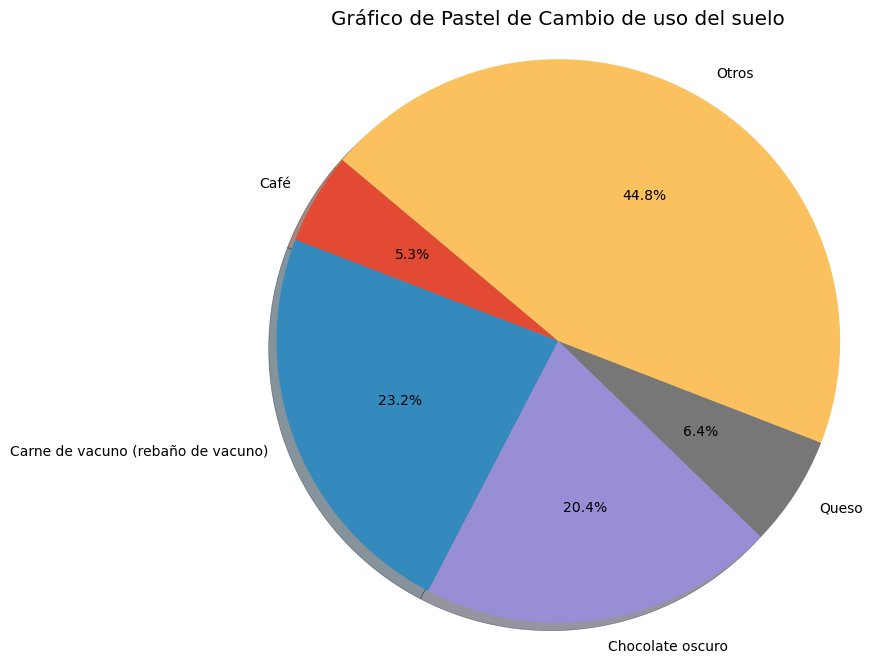

El porcentaje más pequeño en Cambio de uso del suelo es: 0.00%


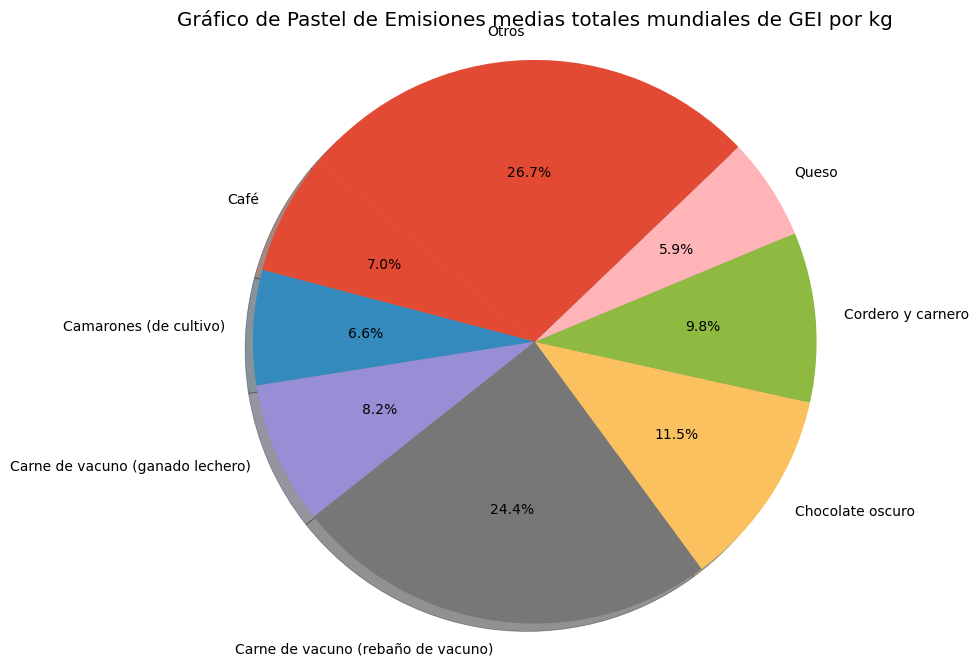

El porcentaje más pequeño en Emisiones medias totales mundiales de GEI por kg es: 0.10%


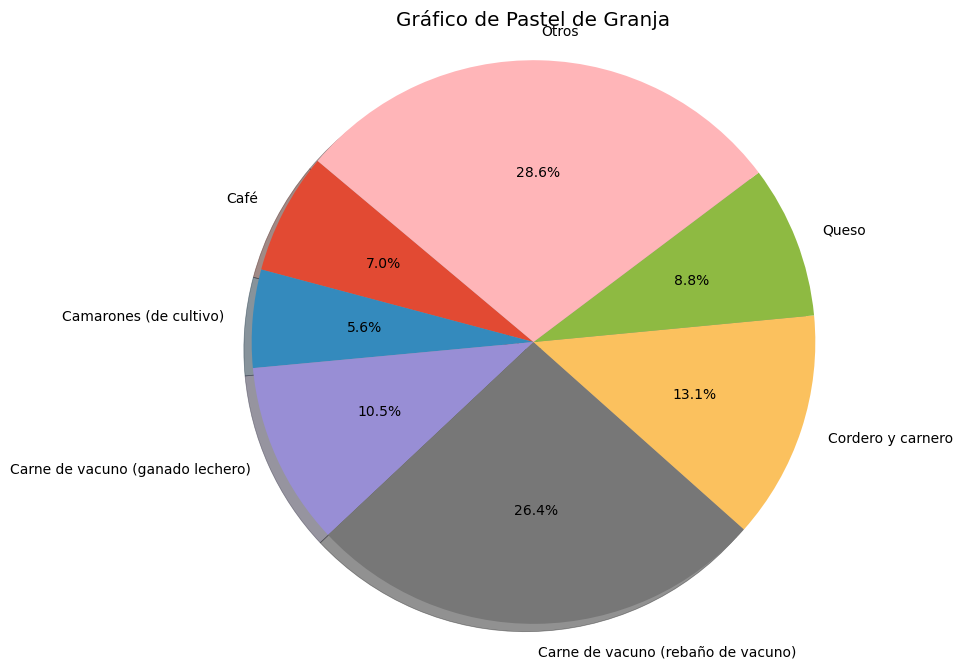

El porcentaje más pequeño en Granja es: 0.06%


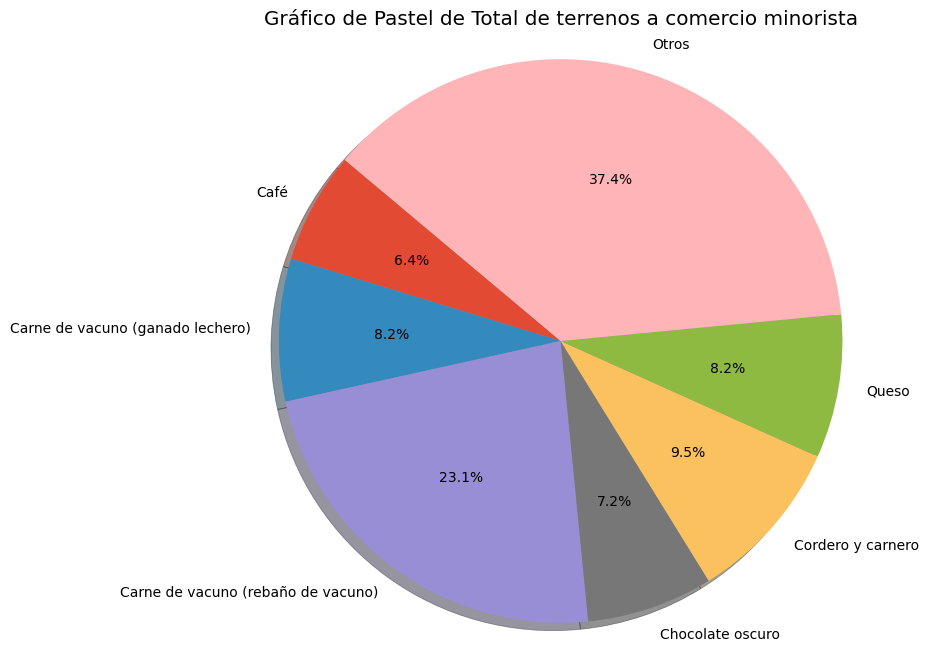

El porcentaje más pequeño en Total de terrenos a comercio minorista es: 0.11%


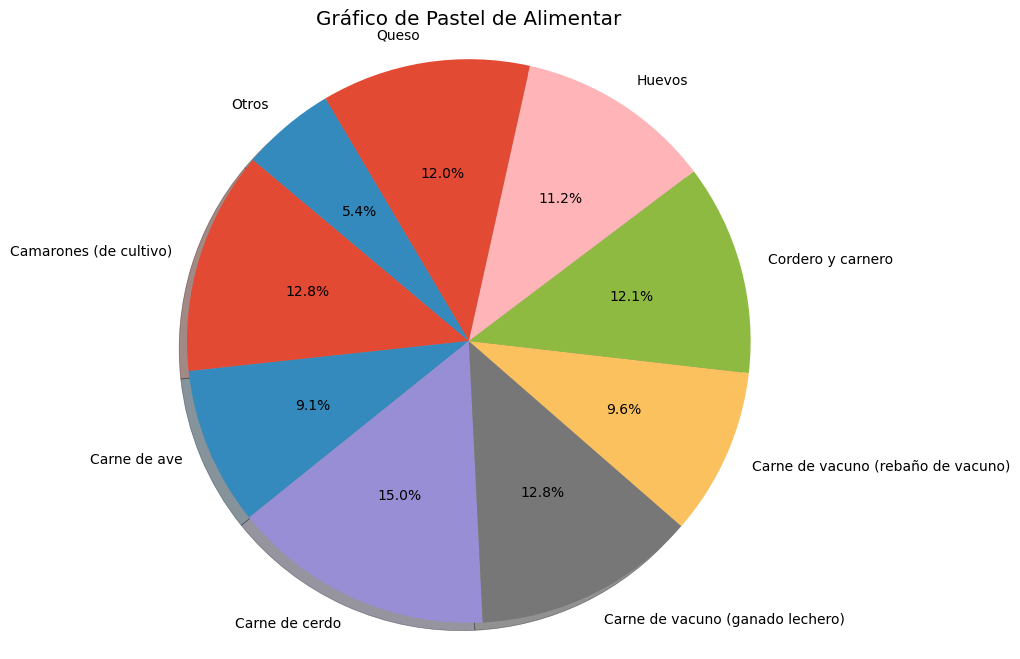

El porcentaje más pequeño en Alimentar es: 0.00%


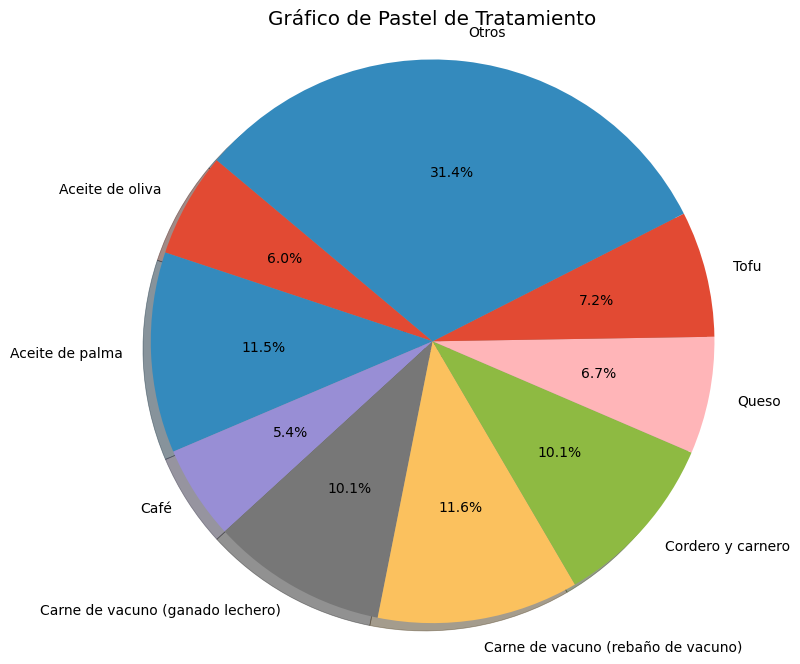

El porcentaje más pequeño en Tratamiento es: 0.00%


In [185]:
# Verificar si la columna 'Producto alimenticio' está presente
food_product_col = df_Food_Product_Emissions.columns[df_Food_Product_Emissions.columns.str.contains('Producto alimenticio', case=False, na=False)]

if food_product_col.empty:
    raise ValueError("No se encontró ninguna columna que contenga 'Food Product'.")
else:
    print("La columna 'Producto alimenticio' está presente.")

# Lista de variables para graficar
variables = [
    'Cambio de uso del suelo',
    'Emisiones medias totales mundiales de GEI por kg',
    'Granja',
    'Total de terrenos a comercio minorista',
    'Alimentar',
    'Tratamiento'
]

# Agrupar los datos por la columna encontrada y sumar las variables
grouped_data = df_Food_Product_Emissions.groupby(food_product_col[0])[variables].sum()

# Comprobar si hay valores negativos en cada variable
for var in variables:
    if (grouped_data[var] < 0).any():
        print(f"Valores negativos encontrados en la variable: {var}")

# Reemplazar valores negativos con cero
grouped_data = grouped_data.clip(lower=0)

# Crear un gráfico de pastel para cada variable
for var in variables:
    plt.figure(figsize=(8, 8))  # Ajustar el tamaño de la figura
    
    # Calcular los porcentajes
    sizes = grouped_data[var]
    total = sizes.sum()
    percentages = sizes / total * 100
    
    # Filtrar los segmentos pequeños (por ejemplo, menos del 5%)
    threshold = 5
    sizes_filtered = sizes[percentages >= threshold]
    labels_filtered = sizes_filtered.index
    sizes_filtered = sizes_filtered.values
    
    # Agregar un segmento "Otros" para los que no cumplen con el umbral
    sizes_others = sizes[percentages < threshold].sum()
    if sizes_others > 0:
        sizes_filtered = list(sizes_filtered) + [sizes_others]
        labels_filtered = list(labels_filtered) + ['Otros']
    
    # Crear el gráfico de pastel
    plt.pie(sizes_filtered, labels=labels_filtered, autopct='%1.1f%%', startangle=140, shadow = True)
    plt.title(f'Gráfico de Pastel de {var}')
    plt.axis('equal')  # Para que el gráfico de pastel sea un círculo
    plt.show()  # Mostrar el gráfico de pastel

    # Mostrar el porcentaje más pequeño
    if sizes_others > 0:
        print(f"El porcentaje más pequeño en {var} es: {percentages[percentages < threshold].min():.2f}%")



La columna 'Producto alimenticio' está presente.
Valores negativos encontrados en la variable: Cambio de uso del suelo


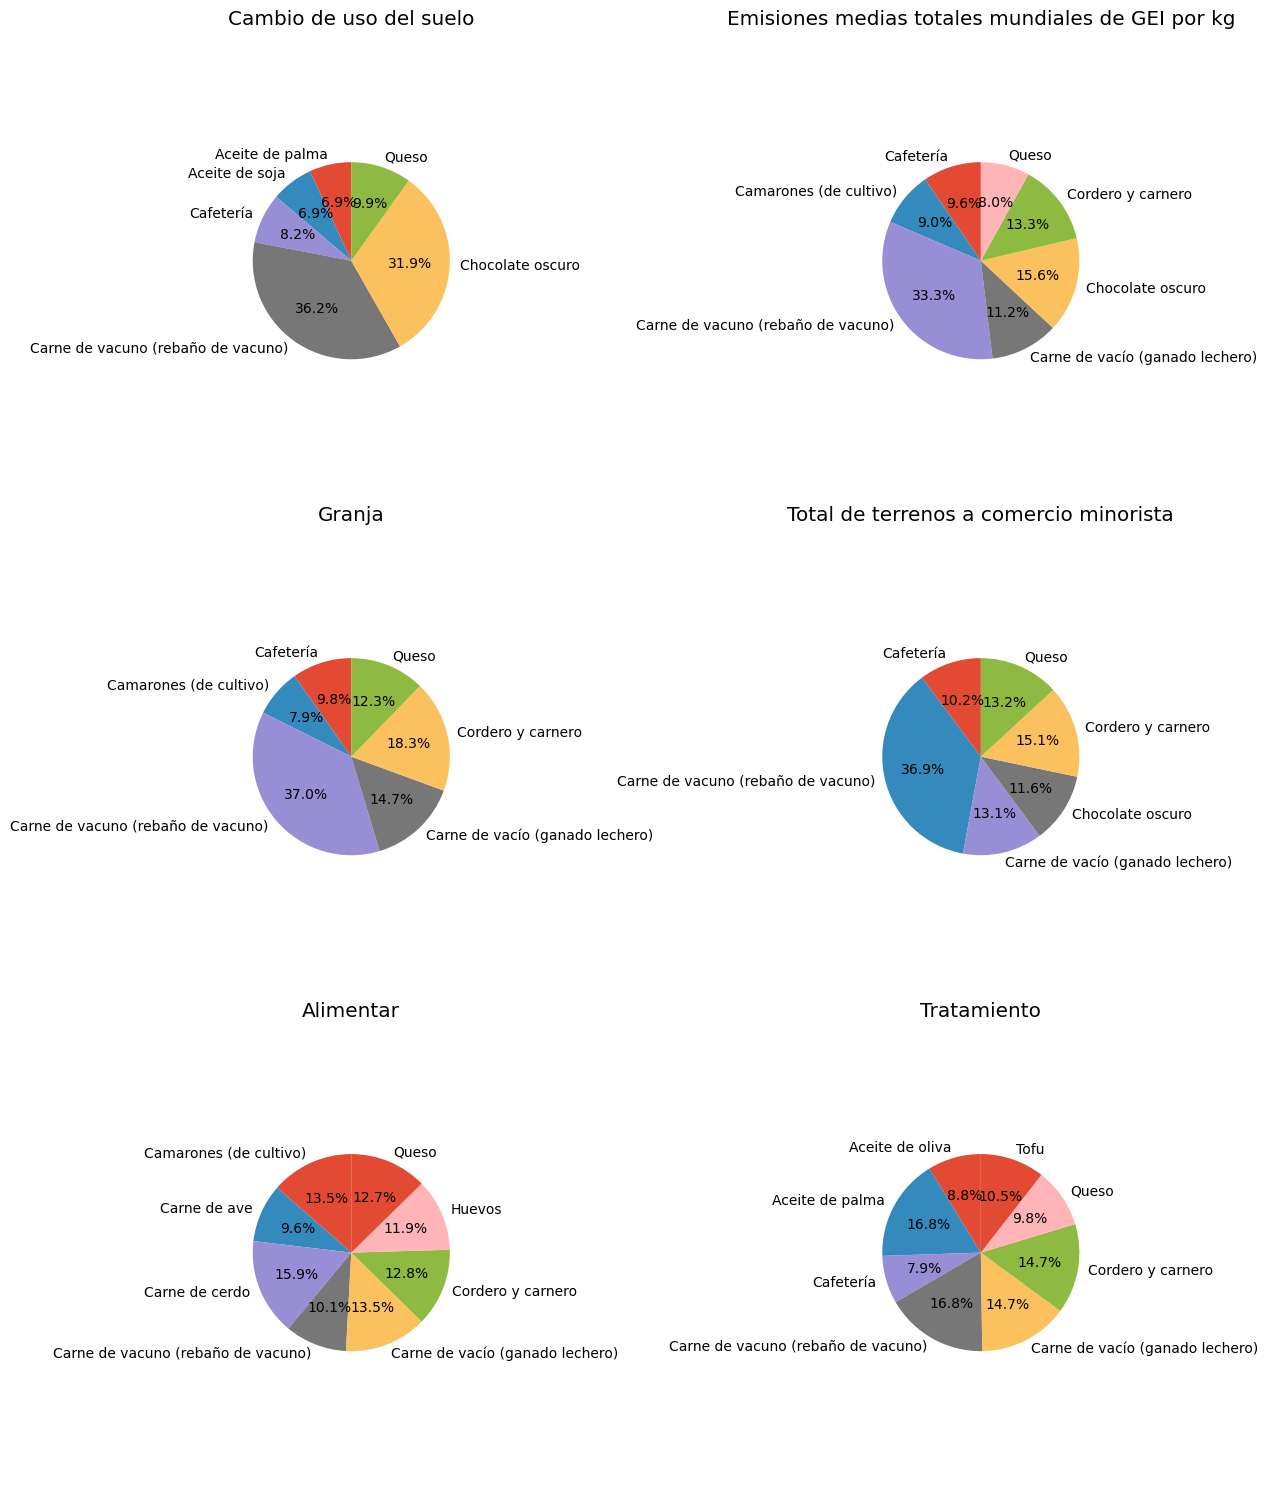

In [133]:
# Verificar si la columna 'Food Product' está presente
food_product_col = df_Food_Product_Emissions.columns[df_Food_Product_Emissions.columns.str.contains('Producto alimenticio', case=False, na=False)]

if food_product_col.empty:
    raise ValueError("No se encontró ninguna columna que contenga 'Food Product'.")
else:
    print("La columna 'Producto alimenticio' está presente.")

# Lista de variables para graficar
variables = [
    'Cambio de uso del suelo',
    'Emisiones medias totales mundiales de GEI por kg',
    'Granja',
    'Total de terrenos a comercio minorista',
    'Alimentar',
    'Tratamiento'
]

# Agrupar los datos por la columna encontrada y sumar las variables
grouped_data = df_Food_Product_Emissions.groupby(food_product_col[0])[variables].sum()

# Comprobar si hay valores negativos en cada variable
for var in variables:
    if (grouped_data[var] < 0).any():
        print(f"Valores negativos encontrados en la variable: {var}")

# Reemplazar valores negativos con cero
grouped_data = grouped_data.clip(lower=0)

# Crear una figura con subgráficos (3 filas y 2 columnas)
n_vars = len(variables)
n_cols = 2  # Número de columnas
n_rows = (n_vars + n_cols - 1) // n_cols  # Calcular el número de filas necesarias

# Ajustar el tamaño de la figura (aumentar el tamaño)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))  # Aumentar el tamaño de la figura

# Aplanar el array de ejes para facilitar la iteración
axes = axes.flatten()

# Crear un gráfico de pastel para cada variable
for ax, var in zip(axes, variables):
    # Calcular los porcentajes
    sizes = grouped_data[var]
    total = sizes.sum()
    
    # Evitar división por cero
    if total == 0:
        print(f"No hay datos para graficar en {var}.")
        continue
    
    percentages = sizes / total * 100
    
    # Filtrar los segmentos pequeños (por ejemplo, menos del 5%)
    threshold = 5
    sizes_filtered = sizes[percentages >= threshold]
    labels_filtered = sizes_filtered.index
    
    # Graficar el gráfico de pastel
    ax.pie(sizes_filtered, labels=labels_filtered, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Para que el gráfico de pastel sea un círculo
    ax.set_title(var)  # Título del gráfico

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()

In [187]:
# en el cambio de suelo hay valores negativos Paso 1: Identificar los valores negativos. reemplazar por media 
negativos = df_Food_Product_Emissions[df_Food_Product_Emissions['Cambio de uso del suelo'] < 0]

# Contar cuántos valores negativos hay
num_negativos = negativos.shape[0]
print(f"Número de valores negativos en 'Cambio de uso del suelo': {num_negativos}")

# Paso 2: Visualizar los datos negativos
if num_negativos > 0:
    print("Datos negativos encontrados:")
    print(negativos)

# Paso 3: Reemplazar valores negativos con la media
# Calcular la media de la columna, ignorando los valores negativos
media_cambio_uso = df_Food_Product_Emissions['Cambio de uso del suelo'][df_Food_Product_Emissions['Cambio de uso del suelo'] >= 0].mean()

# Reemplazar los valores negativos con la media
df_Food_Product_Emissions.loc[df_Food_Product_Emissions['Cambio de uso del suelo'] < 0, 'Cambio de uso del suelo'] = media_cambio_uso

# Guardar el DataFrame modificado en un nuevo archivo CSV
df_Food_Product_Emissions.to_csv('df_Food_Product_Emissions_modificado.csv', index=False)

print("Los valores negativos han sido reemplazados por la media y el DataFrame ha sido guardado.")

Número de valores negativos en 'Cambio de uso del suelo': 0
Los valores negativos han sido reemplazados por la media y el DataFrame ha sido guardado.


La columna 'Producto alimenticio' está presente.


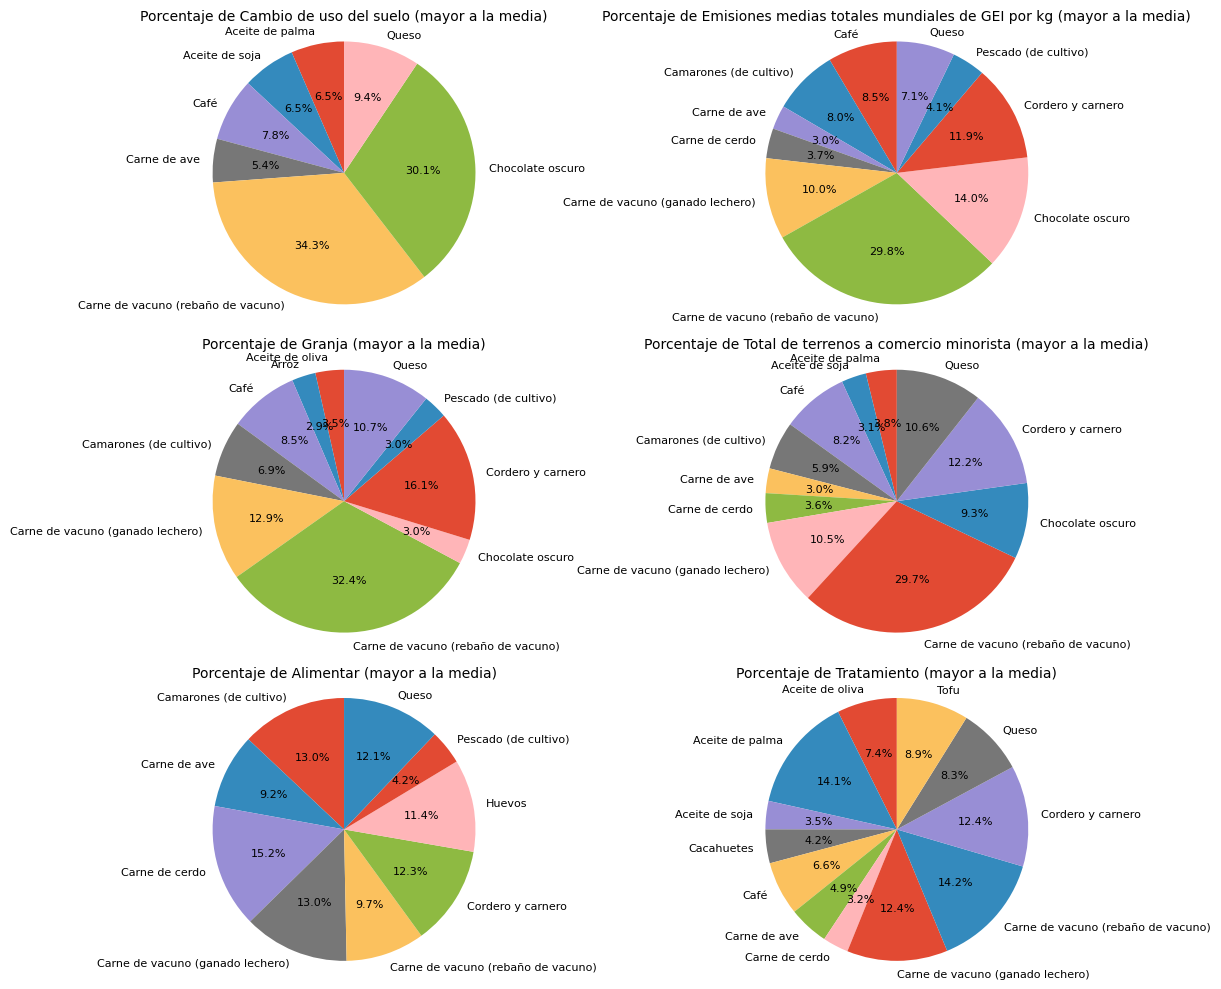

In [189]:
# Ahora graficamos con mas productos con emisiones superior a la media y sin datos negativos 
# Cargar el DataFrame desde el archivo CSV
df_Food_Product_Emissions = pd.read_csv('df_Food_Product_Emissions_modificado.csv')

# Verificar si la columna 'Producto alimenticio' está presente
food_product_col = df_Food_Product_Emissions.columns[df_Food_Product_Emissions.columns.str.contains('Producto alimenticio', case=False, na=False)]

if food_product_col.empty:
    raise ValueError("No se encontró ninguna columna que contenga 'Producto alimenticio'.")
else:
    print("La columna 'Producto alimenticio' está presente.")

# Lista de variables para graficar
variables = [
    'Cambio de uso del suelo',
    'Emisiones medias totales mundiales de GEI por kg',
    'Granja',
    'Total de terrenos a comercio minorista',
    'Alimentar',
    'Tratamiento'
]

# Agrupar los datos por la columna encontrada y sumar las variables
grouped_data = df_Food_Product_Emissions.groupby(food_product_col[0])[variables].sum()

# Comprobar si hay valores negativos en cada variable
for var in variables:
    if (grouped_data[var] < 0).any():
        print(f"Valores negativos encontrados en la variable: {var}")

# Reemplazar valores negativos con cero
grouped_data = grouped_data.clip(lower=0)

# Crear una figura con subgráficos (3 filas y 2 columnas)
n_vars = len(variables)
n_cols = 2  # Número de columnas
n_rows = (n_vars + n_cols - 1) // n_cols  # Calcular el número de filas necesarias

# Ajustar el tamaño de la figura (aumentar el tamaño)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))  # Aumentar el tamaño de la figura a 12x10 pulgadas

# Aplanar el array de ejes para facilitar la iteración
axes = axes.flatten()

# Crear un gráfico de pastel para cada variable
for ax, var in zip(axes, variables):
    # Calcular los porcentajes
    sizes = grouped_data[var]
    total = sizes.sum()
    
    # Evitar división por cero
    if total == 0:
        print(f"No hay datos para graficar en {var}.")
        continue
    
    # Calcular la media
    mean_value = sizes.mean()
    
    # Filtrar productos cuya contaminación sea mayor a la media
    filtered_sizes = sizes[sizes > mean_value]
    
    # Graficar solo si hay datos filtrados
    if not filtered_sizes.empty:
        ax.pie(filtered_sizes, labels=filtered_sizes.index, autopct='%1.1f%%', startangle=90)
        ax.axis('equal')  # Para que el gráfico de pastel sea un círculo
        ax.set_title(f'Porcentaje de {var} (mayor a la media)', fontsize=10)  # Título más pequeño
    else:
        ax.set_title(f'No hay productos con {var} mayores a la media', fontsize=10)  # Título más pequeño

# Ajustar el tamaño de las etiquetas
for ax in axes:
    for text in ax.texts:
        text.set_fontsize(8)  # Tamaño de fuente de las etiquetas más pequeño

# Ajustar el layout
plt.tight_layout()
plt.show()

### Interpretación de los Gráficos

1. *Porcentaje de Cambio de Uso del Suelo*:
   - Los gráficos indican que ciertos productos alimenticios, como la carne, muestran un cambio en el uso del suelo que supera el promedio. Esto sugiere que la producción de estos productos requiere más tierras, lo que puede contribuir a la deforestación y a la pérdida de hábitats naturales.

2. *Porcentaje de Emisiones de GEI por kg*:
   - La carne, en particular, se menciona con un porcentaje de emisiones que está por encima de la media global, lo que implica que su producción genera más gases de efecto invernadero en comparación con otros productos. Esto es crítico para entender el impacto ambiental de las dietas ricas en carne.

3. *Uso de Terrenos a Comercio Minorista*:
   - Los gráficos también reflejan la proporción de terrenos dedicados a la producción de alimentos que llegan al comercio minorista. Si este porcentaje es alto, indica que una gran cantidad de tierra se destina a la producción de ciertos alimentos, posiblemente con implicaciones ambientales significativas.

4. *Comparación de Productos*:
   - La comparación de diferentes productos alimenticios en términos de cambio de uso del suelo y emisiones puede resaltar cuáles son más sostenibles y cuáles requieren una atención especial en términos de impacto ambiental.

5. *Conciencia del Consumidor*: El conocimiento sobre el impacto ambiental de los productos alimenticios puede influir en las decisiones de compra de los consumidores, promoviendo una dieta más sostenible.


### Conclusiones e Insights Clave

- *Impacto de la Producción de Carne*: La producción de carne tiene un alto impacto en el cambio de uso del suelo y las emisiones de GEI, lo que sugiere que reducir el consumo de carne podría ser beneficioso para el medio ambiente.

In [193]:
# - *Impacto de la Producción de Carne*: La producción de carne tiene un alto impacto en el cambio de uso del suelo y 
#las emisiones de GEI, lo que sugiere que reducir el consumo de carne podría ser beneficioso para el medio ambiente.

# Cargar el DataFrame desde el archivo CSV
df_Food_Product_Emissions = pd.read_csv('df_Food_Product_Emissions_modificado.csv')

# Asegurarse de que las columnas relevantes están en el DataFrame
if 'Emisiones medias totales mundiales de GEI por kg' in df_Food_Product_Emissions.columns:
    # Ordenar el DataFrame por emisiones de GEI en orden descendente
    top_polluting_products = df_Food_Product_Emissions.sort_values(
        by='Emisiones medias totales mundiales de GEI por kg',
        ascending=False
    ).head(10)  # Obtener los diez productos más contaminantes

    # Mostrar los resultados
    print("Los cinco productos más contaminantes son:")
    print(top_polluting_products[['Producto alimenticio', 'Emisiones medias totales mundiales de GEI por kg', 'Cambio de uso del suelo']])
else:
    print("La columna 'Emisiones medias totales mundiales de GEI por kg' no está presente en el DataFrame.")

Los cinco productos más contaminantes son:
                  Producto alimenticio  \
3   Carne de vacuno (rebaño de vacuno)   
13                    Chocolate oscuro   
17                   Cordero y carnero   
4     Carne de vacuno (ganado lechero)   
12                                Café   
35              Camarones (de cultivo)   
10                               Queso   
15                Pescado (de cultivo)   
29                      Carne de cerdo   
31                        Carne de ave   

    Emisiones medias totales mundiales de GEI por kg  Cambio de uso del suelo  
3                                              99.48                   16.278  
13                                             46.65                   14.308  
17                                             39.72                    0.468  
4                                              33.30                    0.906  
12                                             28.53                    3.688  
35            

                  Producto alimenticio  Cambio de uso del suelo  Alimentar  \
3   Carne de vacuno (rebaño de vacuno)                   16.278      1.878   
4     Carne de vacuno (ganado lechero)                    0.906      2.508   
17                   Cordero y carnero                    0.468      2.370   
29                      Carne de cerdo                    1.535      2.940   
31                        Carne de ave                    2.540      1.775   

    Granja  Tratamiento  Transporte  Embalaje  Minorista  \
3   39.388        1.269       0.346     0.247      0.164   
4   15.689        1.108       0.424     0.268      0.182   
17  19.508        1.111       0.490     0.251      0.217   
29   1.694        0.284       0.343     0.296      0.190   
31   0.672        0.440       0.276     0.212      0.177   

    Total de terrenos a comercio minorista  \
3                                   59.570   
4                                   21.085   
17                              

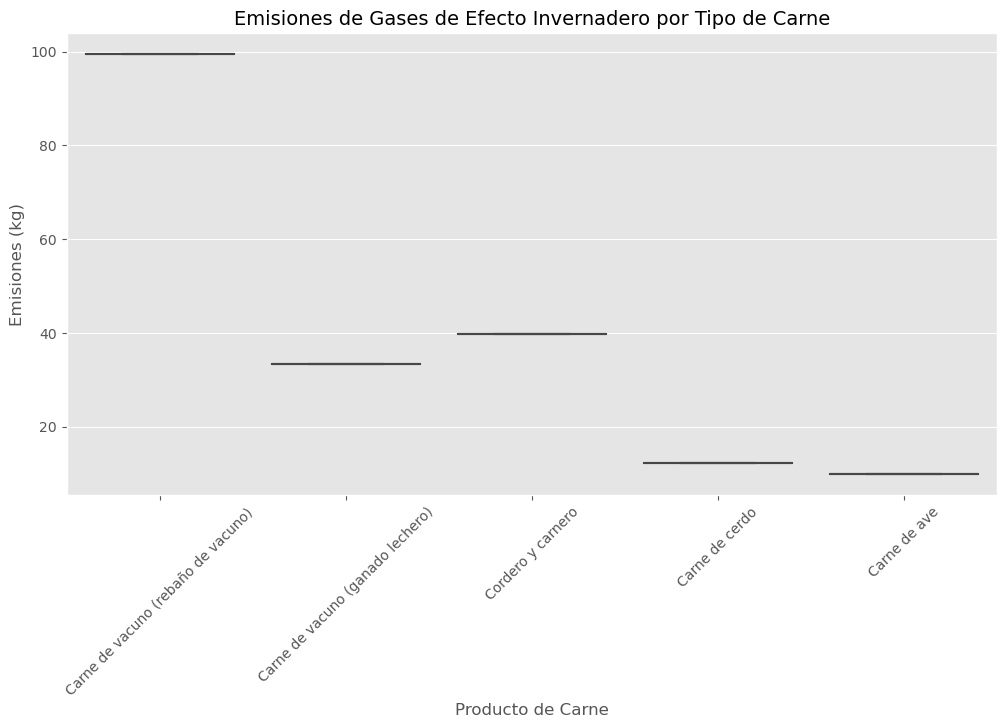

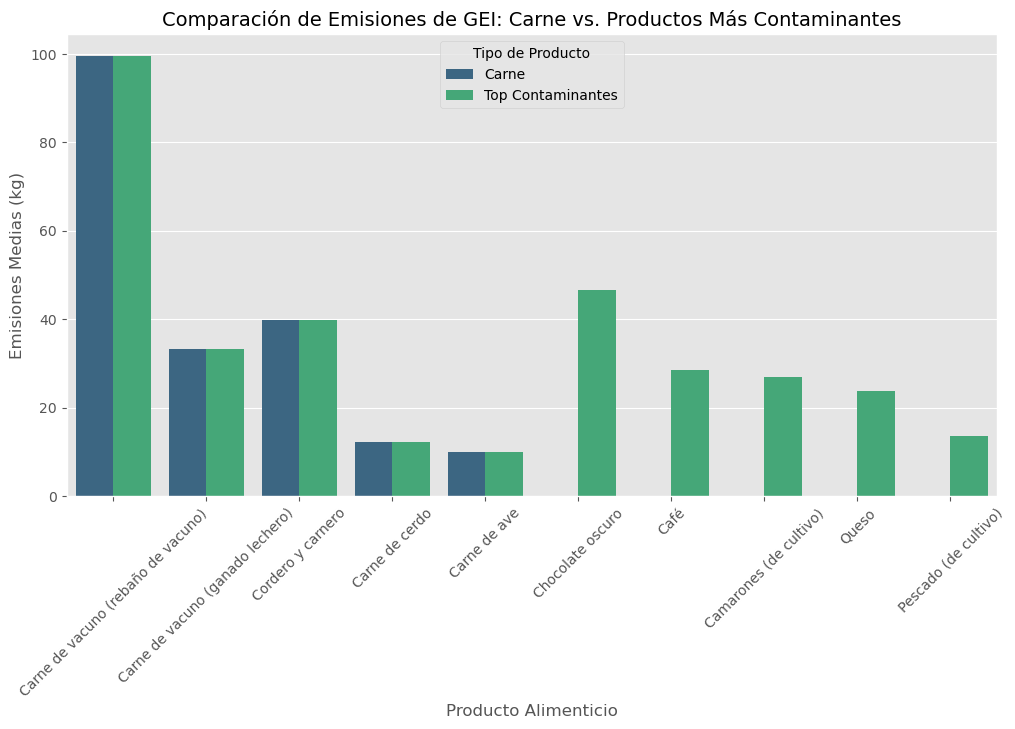

In [195]:
# Cargar el DataFrame desde el archivo CSV
df_Food_Product_Emissions = pd.read_csv('df_Food_Product_Emissions_modificado.csv')

# Ordenar los productos por emisiones de GEI en orden descendente
top_polluting_products = df_Food_Product_Emissions.sort_values(
    by='Emisiones medias totales mundiales de GEI por kg',
    ascending=False
)


# Filtrar los datos para incluir solo productos de carne
meat_products = df_Food_Product_Emissions[df_Food_Product_Emissions['Producto alimenticio'].str.contains('Carne', case=False, na=False)].copy()

# Ver las primeras filas del DataFrame filtrado
print(meat_products.head())

# Descripción estadística de las emisiones de productos de carne
print(meat_products['Emisiones medias totales mundiales de GEI por kg'].describe())

# Visualización de las emisiones de productos de carne
plt.figure(figsize=(12, 6))
sns.boxplot(data=meat_products, x='Producto alimenticio', y='Emisiones medias totales mundiales de GEI por kg')
plt.title('Emisiones de Gases de Efecto Invernadero por Tipo de Carne', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Producto de Carne', fontsize=12)
plt.ylabel('Emisiones (kg)', fontsize=12)
plt.show()

# Obtener los diez productos más contaminantes
top_polluting_products = df_Food_Product_Emissions.sort_values(
    by='Emisiones medias totales mundiales de GEI por kg',
    ascending=False
).head(10).copy()

# Añadir una columna para identificar los productos más contaminantes
top_polluting_products['Tipo'] = 'Top Contaminantes'

# Añadir los productos de carne al DataFrame de comparación
meat_products['Tipo'] = 'Carne'

# Combinar ambos DataFrames para la comparación
comparison_df = pd.concat([meat_products[['Producto alimenticio', 'Emisiones medias totales mundiales de GEI por kg', 'Tipo']],
                            top_polluting_products[['Producto alimenticio', 'Emisiones medias totales mundiales de GEI por kg', 'Tipo']]])

# Visualización de las emisiones medias por tipo de producto
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x='Producto alimenticio', y='Emisiones medias totales mundiales de GEI por kg', hue='Tipo', palette='viridis')
plt.title('Comparación de Emisiones de GEI: Carne vs. Productos Más Contaminantes', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Producto Alimenticio', fontsize=12)
plt.ylabel('Emisiones Medias (kg)', fontsize=12)
plt.legend(title='Tipo de Producto')
plt.show()

                 Producto alimenticio  Cambio de uso del suelo  Alimentar  \
0                            Manzanas                 1.630686      0.000   
1                            Plátanos                 1.630686      0.000   
2                              Cebada                 0.009000      0.000   
3  Carne de vacuno (rebaño de vacuno)                16.278000      1.878   
4    Carne de vacuno (ganado lechero)                 0.906000      2.508   

   Granja  Tratamiento  Transporte  Embalaje  Minorista  \
0   0.225        0.004       0.096     0.044      0.017   
1   0.266        0.059       0.292     0.065      0.021   
2   0.176        0.128       0.035     0.497      0.264   
3  39.388        1.269       0.346     0.247      0.164   
4  15.689        1.108       0.424     0.268      0.182   

   Total de terrenos a comercio minorista  \
0                                   0.357   
1                                   0.678   
2                                   1.109   
3 

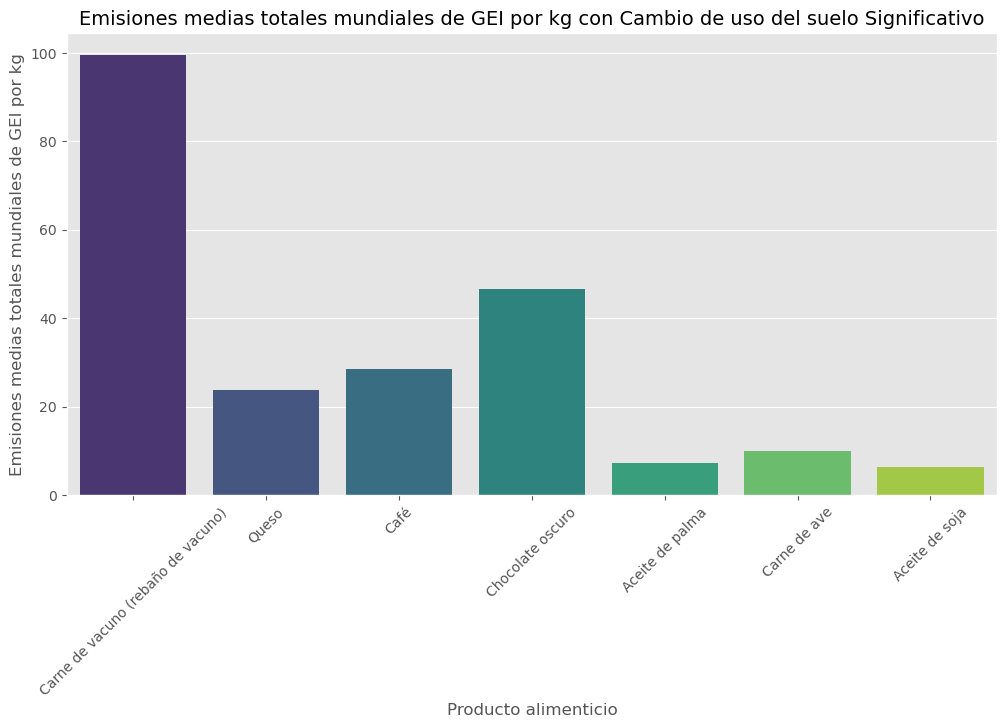

Correlación entre Cambio de uso del suelo y Emisiones medias totales mundiales de GEI por kg:
                                                   Cambio de uso del suelo  \
Cambio de uso del suelo                                          1.000000   
Emisiones medias totales mundiales de GEI por kg                 0.820129   

                                                  Emisiones medias totales mundiales de GEI por kg  
Cambio de uso del suelo                                                                   0.820129  
Emisiones medias totales mundiales de GEI por kg                                          1.000000  


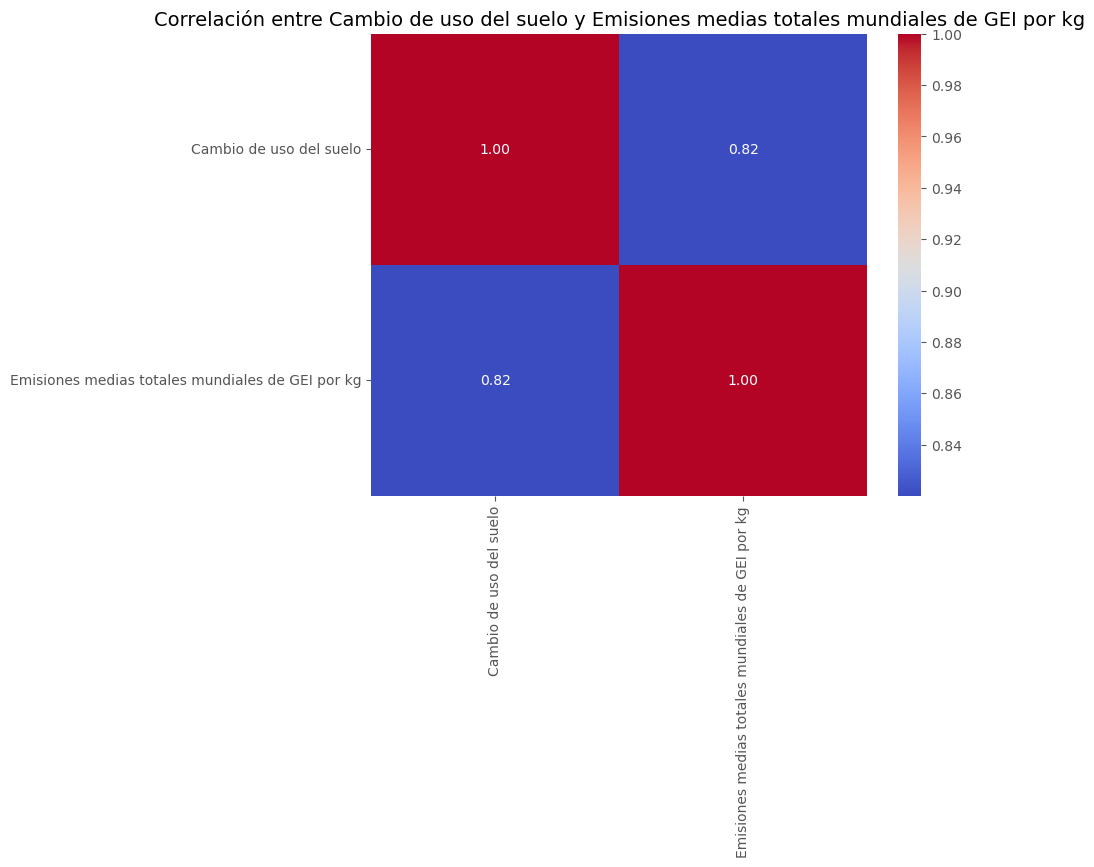

In [197]:
# Necesidad de Prácticas Sostenibles*: Hay una necesidad urgente de adoptar prácticas más sostenibles en 
# la producción agrícola, especialmente para productos que muestran un cambio significativo en el uso del suelo.

# Cargar el DataFrame desde un archivo CSV
df_agricultura = pd.read_csv('df_Food_Product_Emissions_modificado.csv')

# Ver las primeras filas del DataFrame
print(df_agricultura.head())

# Descripción estadística de las emisiones y uso del suelo
print(df_agricultura[['Emisiones medias totales mundiales de GEI por kg', 'Cambio de uso del suelo']].describe())

# Filtrar productos con un uso del suelo significativo
# Definir un umbral para el uso del suelo que consideres significativo
umbral_uso_suelo = df_agricultura['Cambio de uso del suelo'].quantile(0.75)  # Por ejemplo, el cuartil superior
productos_significativos = df_agricultura[df_agricultura['Cambio de uso del suelo'] > umbral_uso_suelo]

# Visualización de las emisiones de productos con uso del suelo significativo
plt.figure(figsize=(12, 6))
sns.barplot(data=productos_significativos, x='Producto alimenticio', y='Emisiones medias totales mundiales de GEI por kg', palette='viridis')
plt.title('Emisiones medias totales mundiales de GEI por kg con Cambio de uso del suelo Significativo', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Producto alimenticio', fontsize=12)
plt.ylabel('Emisiones medias totales mundiales de GEI por kg', fontsize=12)
plt.show()

# Análisis de correlación entre uso del suelo y emisiones de GEI
correlacion = df_agricultura[['Cambio de uso del suelo', 'Emisiones medias totales mundiales de GEI por kg']].corr()
print("Correlación entre Cambio de uso del suelo y Emisiones medias totales mundiales de GEI por kg:\n", correlacion)

# Visualización de la correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre Cambio de uso del suelo y Emisiones medias totales mundiales de GEI por kg', fontsize=14)
plt.show()

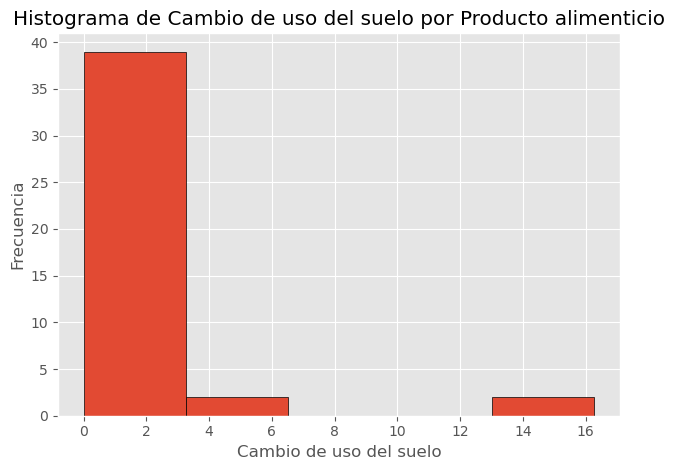

In [29]:
#Como hay mucha variación de land use change, lo mostramos con un histograma.

# Crear el histograma
plt.hist(df_agricultura['Cambio de uso del suelo'], bins=5, edgecolor='black')
plt.xlabel('Cambio de uso del suelo')
plt.ylabel('Frecuencia')  # Cambié 'Producto alimenticio' por 'Frecuencia' para que tenga más sentido
plt.title('Histograma de Cambio de uso del suelo por Producto alimenticio')
plt.tight_layout()
plt.show()

In [199]:
# Filtrar productos por rangos específicos de 'Emisiones medias totales mundiales de GEI por kg

# Ejemplo: identificar productos con 'Total Global Average GHG Emissions per kg' entre 0 y 5
product_range_0_5 = df_agricultura[(df_agricultura['Emisiones medias totales mundiales de GEI por kg'] >= 0) & (df_agricultura['Emisiones medias totales mundiales de GEI por kg'] <= 5)]

print("Producto alimenticio con Cambio de uso del suelo entre 0 y 5:")
print(product_range_0_5[['Producto alimenticio', 'Emisiones medias totales mundiales de GEI por kg']])

# Ejemplo: identificar productos con 'Cambio de uso del suelo' mayores a 10
product_range_above_10 = df_agricultura[df_agricultura['Emisiones medias totales mundiales de GEI por kg'] > 10]

print("\nProductos con Emisiones medias totales mundiales de GEI por kg a 10:")
print(product_range_above_10[['Producto alimenticio', 'Emisiones medias totales mundiales de GEI por kg']])

Producto alimenticio con Cambio de uso del suelo entre 0 y 5:
   Producto alimenticio  Emisiones medias totales mundiales de GEI por kg
0              Manzanas                                              0.43
1              Plátanos                                              0.86
2                Cebada                                              1.18
5   Azúcar de remolacha                                              1.81
6          Bayas y uvas                                              1.53
7             Brassicas                                              0.51
8        Azúcar de caña                                              3.20
9              Mandioca                                              1.32
11        Fruta cítrica                                              0.39
14               Huevos                                              4.67
16           Cacahuetes                                              3.23
18                 Maíz                           

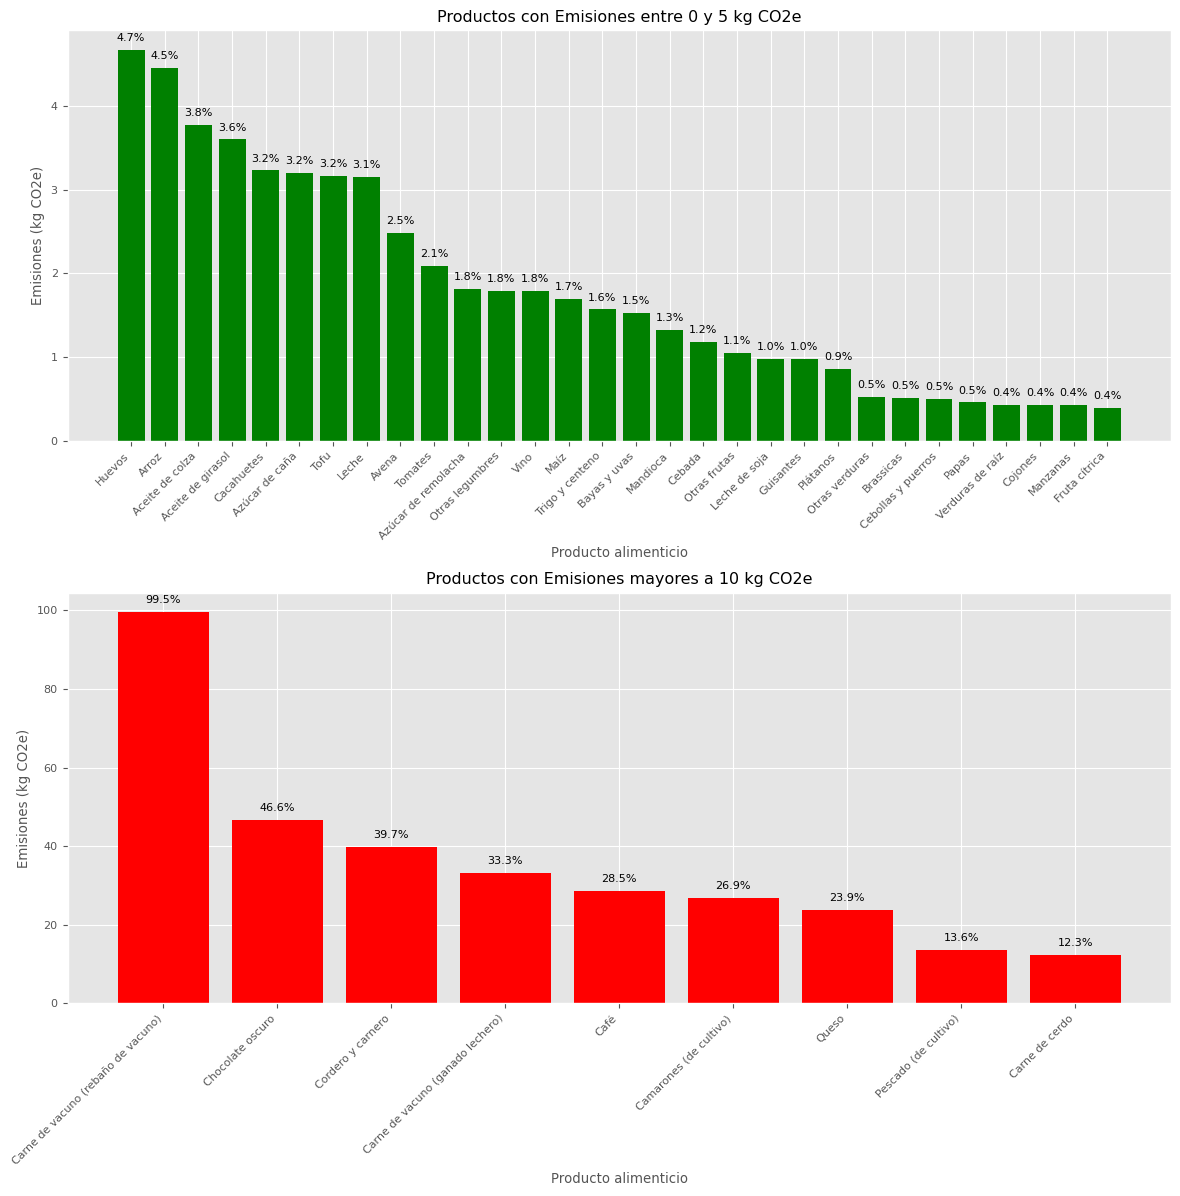

In [201]:
# Hacemos un gráfico con estos datos. histograma 
# Ordenar los datos de manera descendente
product_range_0_5_sorted = product_range_0_5.sort_values('Emisiones medias totales mundiales de GEI por kg', ascending=False)
product_range_above_10_sorted = product_range_above_10.sort_values('Emisiones medias totales mundiales de GEI por kg', ascending=False)

# Configurar el tamaño de la letra para las etiquetas del eje x
plt.rcParams.update({'font.size': 8})  # Puedes cambiar el número para ajustar el tamaño de la letra

# Configurar el gráfico
plt.figure(figsize=(12, 12))  # Ajusta el tamaño de la figura si es necesario

# Gráfico para productos con emisiones entre 0 y 5
ax1 = plt.subplot(2, 1, 1)  # 2 filas, 1 columna, primer gráfico
ax1.bar(product_range_0_5_sorted['Producto alimenticio'], 
        product_range_0_5_sorted['Emisiones medias totales mundiales de GEI por kg'], 
        color='green')
add_labels(ax1)  # Llamada a la función para añadir etiquetas de porcentaje
plt.title('Productos con Emisiones entre 0 y 5 kg CO2e')
plt.xlabel('Producto alimenticio')
plt.ylabel('Emisiones (kg CO2e)')
plt.xticks(rotation=45, ha='right')

# Gráfico para productos con emisiones mayores a 10
ax2 = plt.subplot(2, 1, 2)  # 2 filas, 1 columna, segundo gráfico
ax2.bar(product_range_above_10_sorted['Producto alimenticio'], 
        product_range_above_10_sorted['Emisiones medias totales mundiales de GEI por kg'], 
        color='red')
add_labels(ax2)  # Llamada a la función para añadir etiquetas de porcentaje
plt.title('Productos con Emisiones mayores a 10 kg CO2e')
plt.xlabel('Producto alimenticio')
plt.ylabel('Emisiones (kg CO2e)')
plt.xticks(rotation=45, ha='right')

# Ajustar el layout
plt.tight_layout()
plt.show()

### Conclusiones Generales
1. *Impacto Ambiental*: La producción de ciertos alimentos, especialmente los de origen animal y productos altamente procesados, tiene un impacto ambiental considerablemente mayor en comparación con productos vegetales o menos procesados.
2. *Decisiones Sostenibles*: Promover el consumo de productos con bajas emisiones puede ser una estrategia efectiva para reducir la huella de carbono alimentaria.
3. *Conciencia del Consumidor*: Es importante que los consumidores estén informados sobre las emisiones asociadas con los productos que eligen, lo que puede influir en sus decisiones de compra hacia opciones más sostenibles.

Estos gráficos subrayan la importancia de considerar el impacto ambiental de nuestras elecciones alimentarias.

In [203]:
# Filtrar productos por rangos específicos de 'Granja'

# Ejemplo: identificar productos con 'Granja' entre 0 y 5
product_range_0_5 = df_agricultura[(df_agricultura['Granja'] >= 0) & (df_agricultura['Granja'] <= 5)]

print("Granja 0 y 5:")
print(product_range_0_5[['Producto alimenticio', 'Granja']])

# Ejemplo: identificar productos con 'Cambio de uso del suelo' mayores a 10
product_range_above_10 = df_agricultura[df_agricultura['Granja'] > 10]

print("\nProductos con Granja a 10:")
print(product_range_above_10[['Producto alimenticio', 'Granja']])

Granja 0 y 5:
    Producto alimenticio  Granja
0               Manzanas   0.225
1               Plátanos   0.266
2                 Cebada   0.176
5    Azúcar de remolacha   0.536
6           Bayas y uvas   0.722
7              Brassicas   0.278
8         Azúcar de caña   0.485
9               Mandioca   0.220
11         Fruta cítrica   0.307
13      Chocolate oscuro   3.706
14                Huevos   1.317
15  Pescado (de cultivo)   3.598
16            Cacahuetes   1.425
18                  Maíz   0.475
19                 Leche   1.458
20               Cojones   2.126
21                 Avena   1.370
22       Aceite de oliva   4.272
23    Cebollas y puerros   0.211
24          Otras frutas   0.369
25       Otras legumbres   1.089
26        Otras verduras   0.174
27       Aceite de palma   2.107
28             Guisantes   0.717
29        Carne de cerdo   1.694
30                 Papas   0.193
31          Carne de ave   0.672
32       Aceite de colza   2.343
33                 Arroz   3.

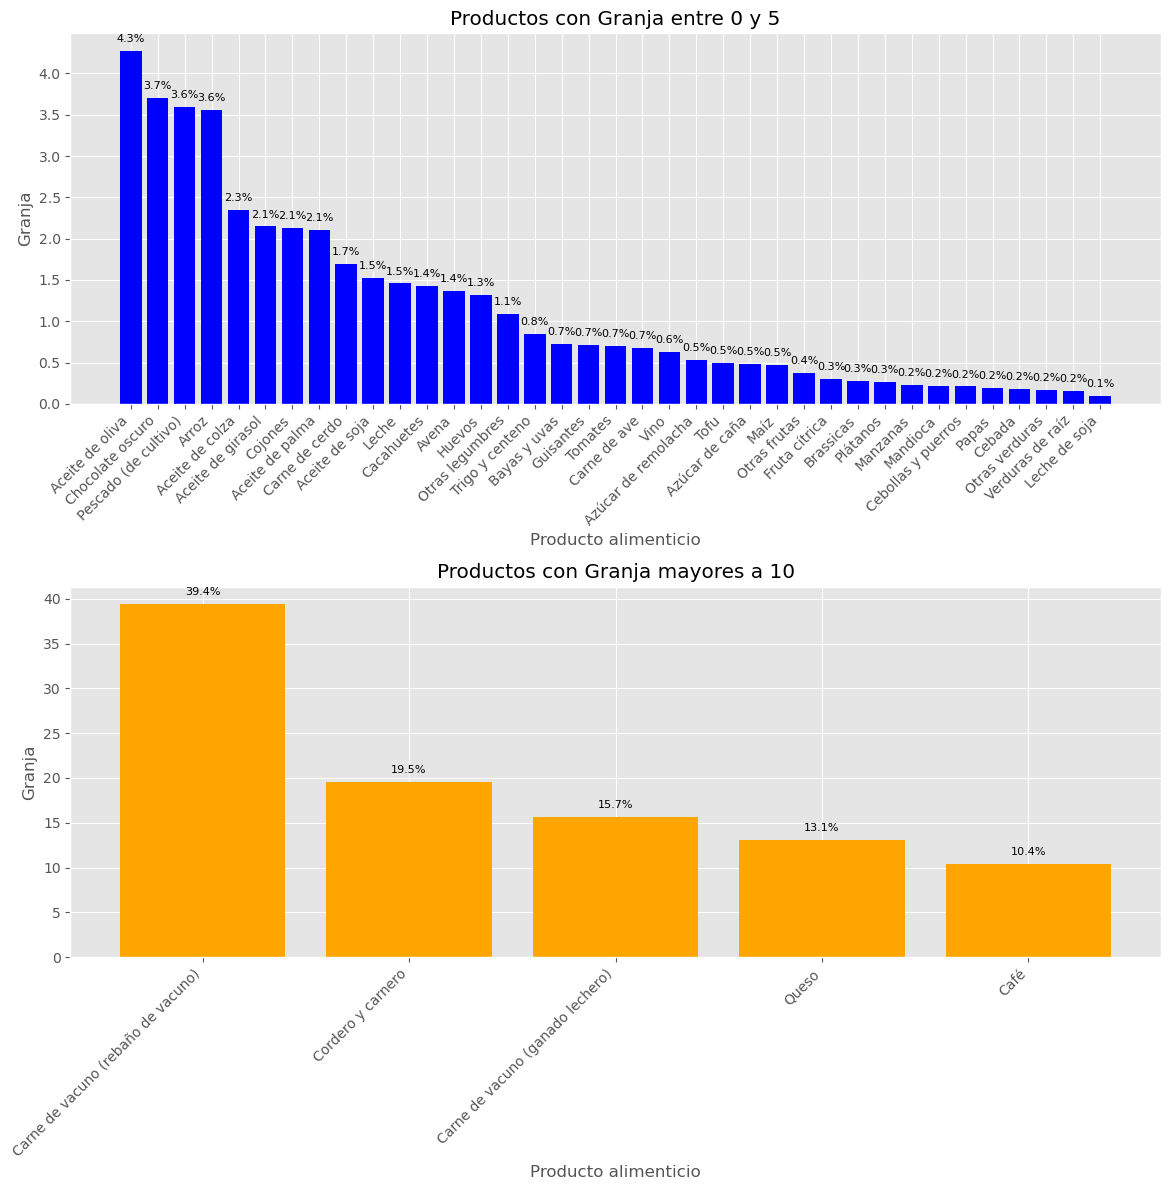

In [205]:
# Ordenar los datos de manera descendente
product_range_0_5_sorted = product_range_0_5.sort_values('Granja', ascending=False)
product_range_above_10_sorted = product_range_above_10.sort_values('Granja', ascending=False)

# Configurar el gráfico
plt.figure(figsize=(12, 12))  # Ajusta el tamaño de la figura si es necesario

# Configurar el tamaño de la letra para las etiquetas del eje x
plt.rcParams.update({'font.size': 10})  # Puedes cambiar el número para ajustar el tamaño de la letra

# Gráfico para productos con 'Granja' entre 0 y 5
ax1 = plt.subplot(2, 1, 1)  # 2 filas, 1 columna, primer gráfico
ax1.bar(product_range_0_5_sorted['Producto alimenticio'], 
        product_range_0_5_sorted['Granja'], 
        color='blue')
add_labels(ax1)  # Llamada a la función para añadir etiquetas
plt.title('Productos con Granja entre 0 y 5')
plt.xlabel('Producto alimenticio')
plt.ylabel('Granja')
plt.xticks(rotation=45, ha='right')

# Gráfico para productos con 'Granja' mayores a 10
ax2 = plt.subplot(2, 1, 2)  # 2 filas, 1 columna, segundo gráfico
ax2.bar(product_range_above_10_sorted['Producto alimenticio'], 
        product_range_above_10_sorted['Granja'], 
        color='orange')
add_labels(ax2)  # Llamada a la función para añadir etiquetas
plt.title('Productos con Granja mayores a 10')
plt.xlabel('Producto alimenticio')
plt.ylabel('Granja')
plt.xticks(rotation=45, ha='right')

# Ajustar el layout
plt.tight_layout()
plt.show()

In [207]:
# Filtrar productos por rangos específicos de 'Alimentar o pasto'

# Ejemplo: identificar productos con 'Tratamiento' entre 0 y 5
product_range_0_5 = df_agricultura[(df_agricultura['Alimentar'] >= 0) & (df_agricultura['Alimentar'] <= 5)]

print("Productos con Alimentar entre 0 y 5:")
print(product_range_0_5[['Producto alimenticio', 'Alimentar']])

# Ejemplo: identificar productos con 'Alimentar' mayores a 10
product_range_above_10 = df_agricultura[df_agricultura['Alimentar'] > 10]

print("\nProductos con Alimentar mayor a 10:")
print(product_range_above_10[['Producto alimenticio', 'Alimentar']])

Productos con Alimentar entre 0 y 5:
                  Producto alimenticio  Alimentar
0                             Manzanas      0.000
1                             Plátanos      0.000
2                               Cebada      0.000
3   Carne de vacuno (rebaño de vacuno)      1.878
4     Carne de vacuno (ganado lechero)      2.508
5                  Azúcar de remolacha      0.000
6                         Bayas y uvas      0.000
7                            Brassicas      0.000
8                       Azúcar de caña      0.000
9                             Mandioca      0.000
10                               Queso      2.346
11                       Fruta cítrica      0.000
12                                Café      0.000
13                    Chocolate oscuro      0.000
14                              Huevos      2.200
15                Pescado (de cultivo)      0.819
16                          Cacahuetes      0.000
17                   Cordero y carnero      2.370
18           

No hay productos con 'Alimentar' mayores a 10.


<Figure size 1200x1200 with 0 Axes>

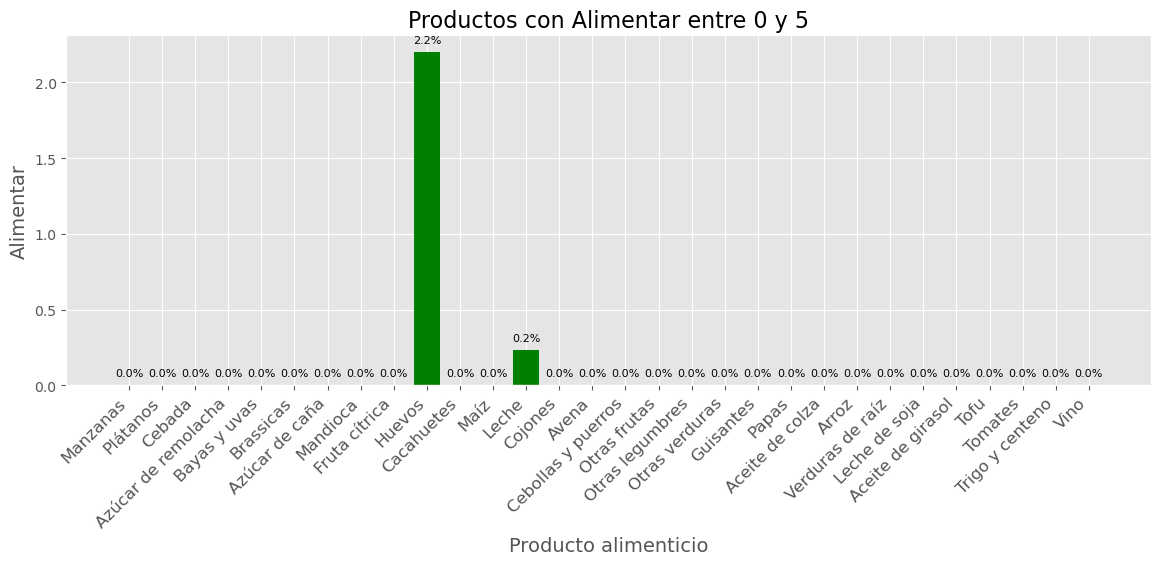

In [80]:
# Ordenar los datos de manera descendente
product_range_0_5_sorted = product_range_0_5.sort_values('Alimentar', ascending=False)
product_range_above_10_sorted = product_range_above_10.sort_values('Alimentar', ascending=False)

# Configurar el gráfico
plt.figure(figsize=(12, 12))  # Ajusta el tamaño de la figura si es necesario

# Configurar el gráfico
plt.figure(figsize=(14, 10))  # Aumentar el tamaño de la figura

# Gráfico para productos con 'Alimentar' entre 0 y 5
ax1 = plt.subplot(2, 1, 1)  # 2 filas, 1 columna, primer gráfico
ax1.bar(product_range_0_5['Producto alimenticio'], 
        product_range_0_5['Alimentar'], 
        color='green')
add_labels(ax1)  # Llamada a la función para añadir etiquetas
plt.title('Productos con Alimentar entre 0 y 5', fontsize=16)
plt.xlabel('Producto alimenticio', fontsize=14)
plt.ylabel('Alimentar', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)


# Filtrar productos con 'Alimentar' mayores a 10
product_range_above_10 = df_agricultura[df_agricultura['Alimentar'] > 10]

# Verificar si hay productos en el rango
if product_range_above_10.empty:
    print("No hay productos con 'Alimentar' mayores a 10.")
else:
    # Configurar el gráfico
    ax2 = plt.figure(figsize=(14, 5))  # Aumentar el tamaño de la figura

    # Gráfico para productos con 'Alimentar' mayores a 10
    ax2.bar(product_range_above_10['Producto alimenticio'], 
            product_range_above_10['Alimentar'], 
            color='red')
    add_labels(ax2)  # Llamada a la función para añadir etiquetas
    plt.title('Productos con Alimentar mayores a 10', fontsize=16)
    plt.xlabel('Producto alimenticio', fontsize=14)
    plt.ylabel('Alimentar', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)

    # Ajustar el layout
    plt.tight_layout()
    plt.show()

In [209]:
# Filtrar productos por rangos específicos de 'Total de terrenos a comercio minorista'

# Ejemplo: identificar productos con 'Total de terrenos a comercio minorista' entre 0 y 5
product_range_0_5 = df_agricultura[(df_agricultura['Total de terrenos a comercio minorista'] >= 0) & (df_agricultura['Total de terrenos a comercio minorista'] <= 5)]

print("Total de terrenos a comercio minorista 0 y 5:")
print(product_range_0_5[['Producto alimenticio', 'Total de terrenos a comercio minorista']])

# Ejemplo: identificar productos con 'Total from Land to Retail' mayores a 10
product_range_above_10 = df_agricultura[df_agricultura['Total de terrenos a comercio minorista'] > 10]

print("\nProductos con Total de terrenos a comercio minorista a 10:")
print(product_range_above_10[['Producto alimenticio', 'Total de terrenos a comercio minorista']])

Total de terrenos a comercio minorista 0 y 5:
   Producto alimenticio  Total de terrenos a comercio minorista
0              Manzanas                                   0.357
1              Plátanos                                   0.678
2                Cebada                                   1.109
5   Azúcar de remolacha                                   1.536
6          Bayas y uvas                                   1.214
7             Brassicas                                   0.437
8        Azúcar de caña                                   2.672
9              Mandioca                                   0.987
11        Fruta cítrica                                   0.317
14               Huevos                                   4.507
16           Cacahuetes                                   2.497
18                 Maíz                                   0.988
19                Leche                                   2.781
20              Cojones                                   

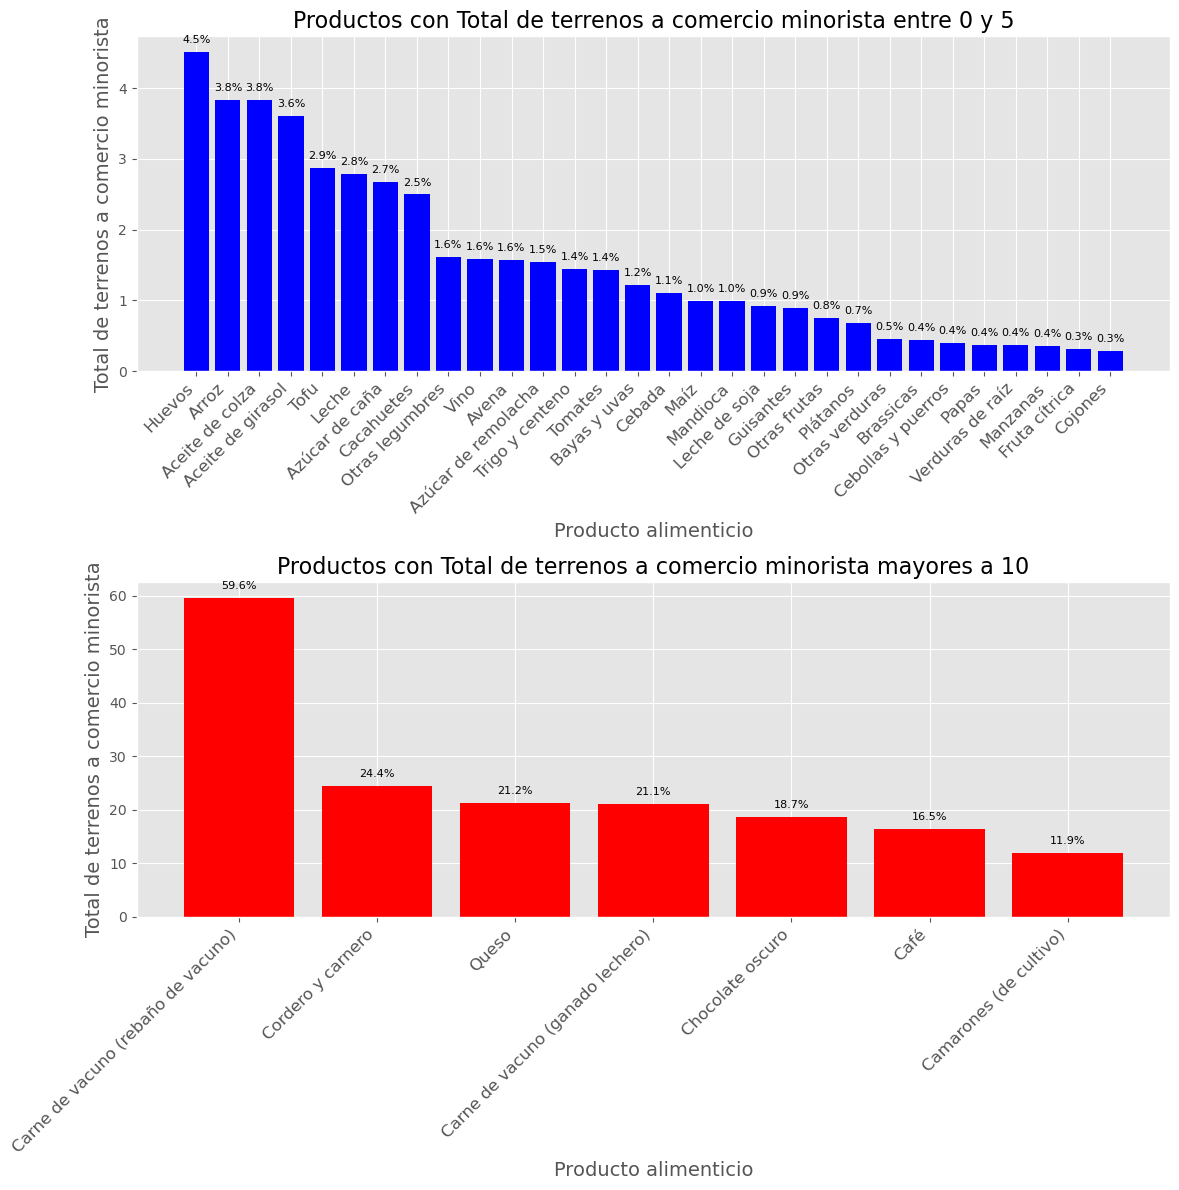

In [211]:
# Ordenar los datos de manera descendente
product_range_0_5_sorted = product_range_0_5.sort_values('Total de terrenos a comercio minorista', ascending=False)
product_range_above_10_sorted = product_range_above_10.sort_values('Total de terrenos a comercio minorista', ascending=False)

# Configurar el gráfico
plt.figure(figsize=(12, 12))  # Ajusta el tamaño de la figura si es necesario

# Gráfico para productos con 'Total de terrenos a comercio minorista' entre 0 y 5
ax1 = plt.subplot(2, 1, 1)  # Crear un subplot para el primer gráfico (2 filas, 1 columna, primer gráfico)
ax1.bar(product_range_0_5_sorted['Producto alimenticio'], 
        product_range_0_5_sorted['Total de terrenos a comercio minorista'], 
        color='blue')
add_labels(ax1)  # Llamada a la función para añadir etiquetas
plt.title('Productos con Total de terrenos a comercio minorista entre 0 y 5', fontsize=16)
plt.xlabel('Producto alimenticio', fontsize=14)
plt.ylabel('Total de terrenos a comercio minorista', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Gráfico para productos con 'Total de terrenos a comercio minorista' mayores a 10
ax2 = plt.subplot(2, 1, 2)  # Crear un subplot para el segundo gráfico (2 filas, 1 columna, segundo gráfico)
ax2.bar(product_range_above_10_sorted['Producto alimenticio'], 
        product_range_above_10_sorted['Total de terrenos a comercio minorista'], 
        color='red')
add_labels(ax2)  # Llamada a la función para añadir etiquetas
plt.title('Productos con Total de terrenos a comercio minorista mayores a 10', fontsize=16)
plt.xlabel('Producto alimenticio', fontsize=14)
plt.ylabel('Total de terrenos a comercio minorista', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Ajustar el layout
plt.tight_layout()
plt.show()

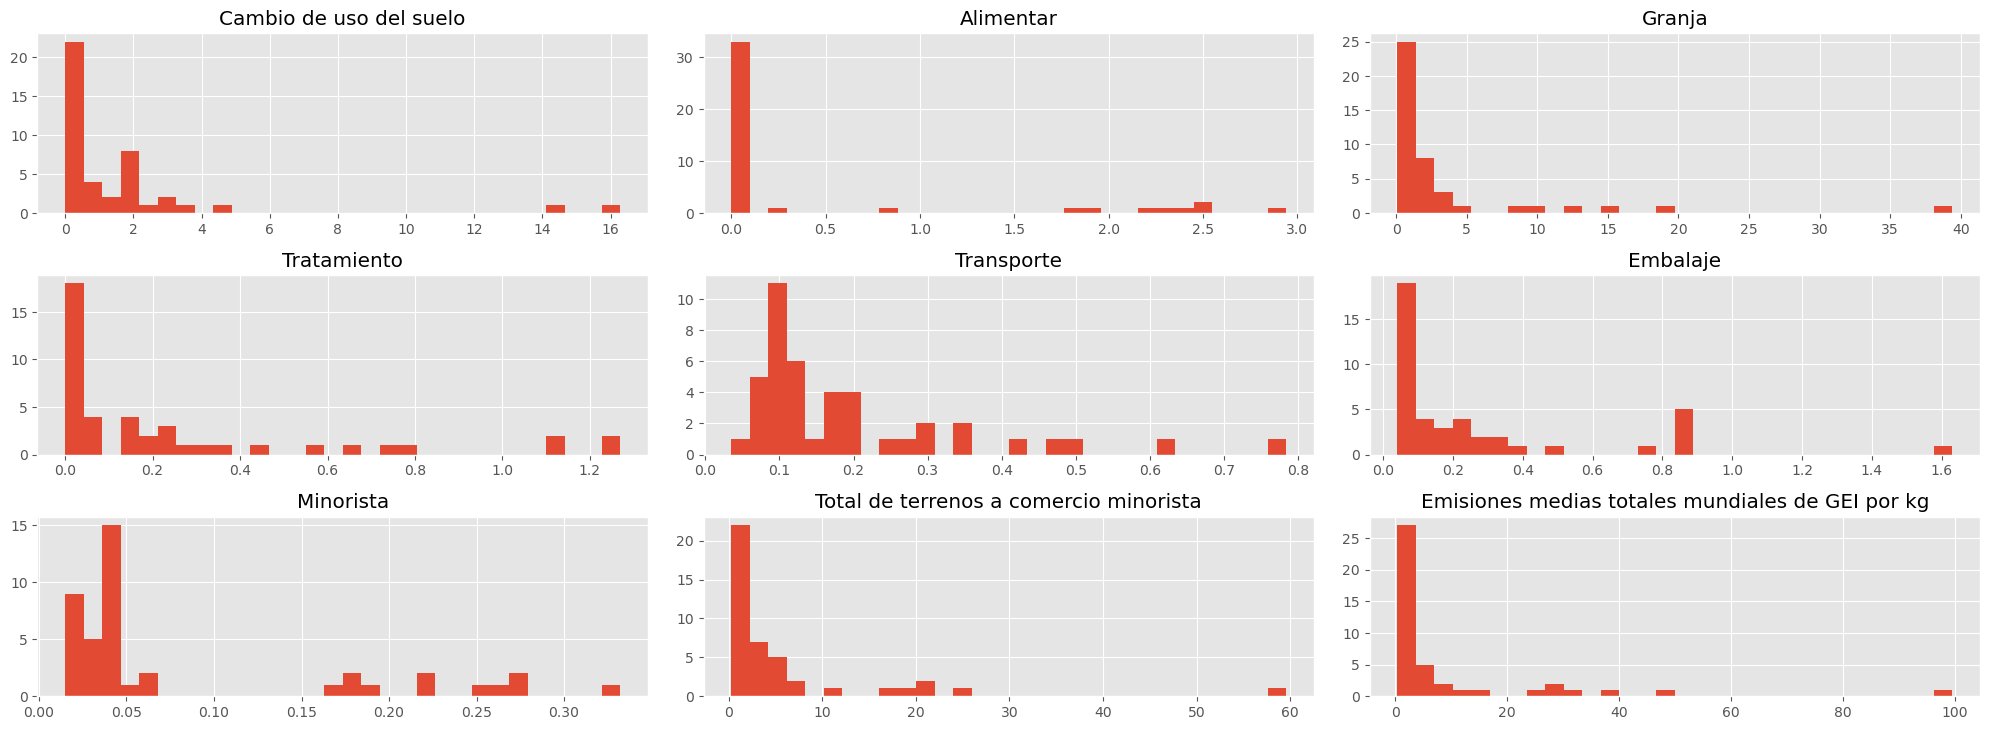

In [213]:
# 7 - Analizar las posibles interacciones entre las variables del dataset
# Analisis bivariado. Histograma y matriz de correlación que nos aproxima la distribución de las variables numericas, para entender como se distrubuyen sus valores:Visualización: Histograma de las variables numéricas para ver su distribución y Matriz de correlación para visualizar relaciones entre variables numéricas.
df_agricultura.hist(bins=30, figsize=(20, 12), layout=(5, 3))
plt.tight_layout()
plt.show()

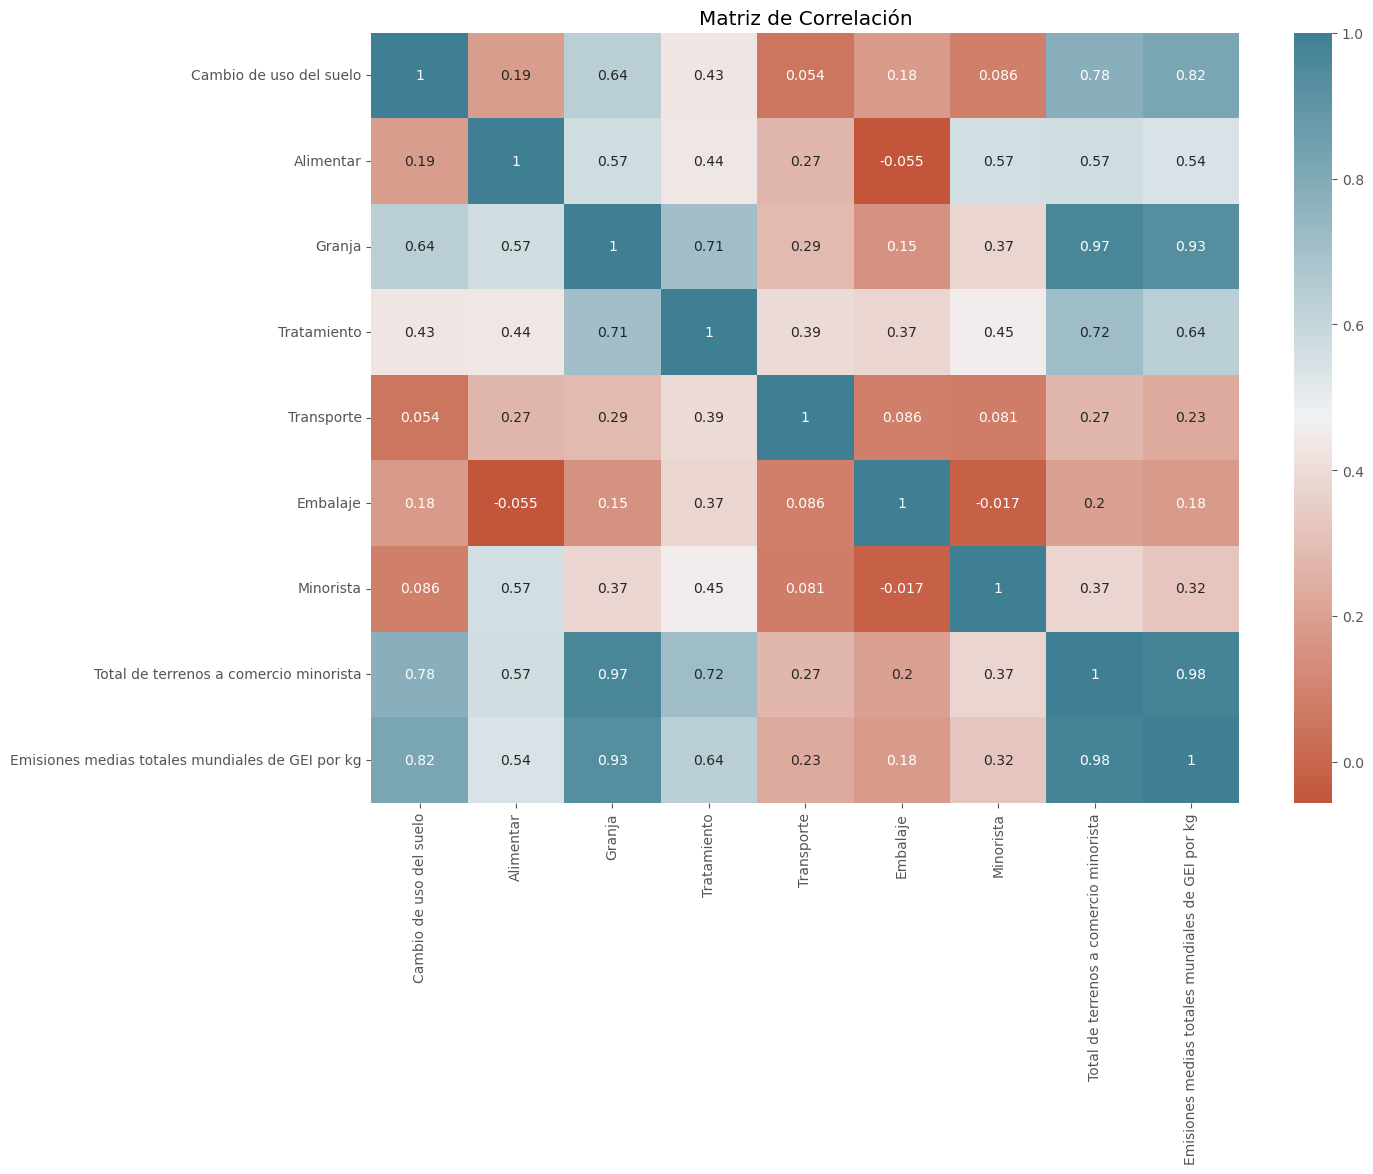

In [214]:
# Visualización: Matriz de correlación para visualizar relaciones entre variables numéricas.
# Filtrar solo las columnas numéricas
numeric_df = df_agricultura.select_dtypes(include=['number'])
# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()
# Crear el mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap = sns.diverging_palette(20, 220, n=256))
plt.title('Matriz de Correlación')
plt.show()

Con estos datos, generamos INSIGHTS, analizando las variables más importantes que nos ayuden a dar respuesta a nuestro problema.

### 7. Insights de los Histogramas y Correlaciones. ANALYSIS BUSINES

A partir de la matriz de correlación presentada, podemos obtener varios insights y conclusiones sobre las relaciones entre las diferentes variables en el conjunto de datos de "Food Product Emissions". A continuación, se detallan los puntos clave:

### Insights de la Matriz de Correlación:

1. *Correlaciones Positivas*:
   - *Farm Processing y Total from Land to Retail (0.70)*: Esta es una correlación fuerte, lo que sugiere que a medida que aumentan las emisiones en la fase de procesamiento, también lo hacen las emisiones totales desde la producción hasta el retail. Esto indica que la eficiencia en el procesamiento podría tener un impacto significativo en la reducción de las emisiones totales.
   
   - *Land Use Change y Feed (0.68)*: Existe una correlación positiva considerable entre el cambio de uso de la tierra y las emisiones de la alimentación. Esto implica que los métodos de alimentación utilizados pueden estar vinculados a cómo se utilizan los terrenos, lo que puede influir en las emisiones totales.

2. *Correlaciones Moderadas*:
   - *Feed y Farm Processing (0.44)*: Esta correlación moderada sugiere que un aumento en las emisiones de alimentación también puede estar relacionado con un aumento en las emisiones durante el procesamiento agrícola, lo que resalta la importancia de la cadena de suministro en la sostenibilidad.
   
   - *Packaging y Total from Land to Retail (0.57)*: Aunque la correlación no es tan fuerte como las anteriores, indica que las emisiones de empaque también pueden contribuir a las emisiones totales, lo que sugiere que optimizar el empaque podría ser otra área para explorar en la reducción de emisiones.

3. *Correlaciones Negativas*:
   - *Transport y Land Use Change (-0.24)*: Esto indica una relación inversa, sugiriendo que a medida que las emisiones por el uso de la tierra aumentan, las emisiones por transporte pueden disminuir. Esto podría ser un indicativo de que los productos que requieren más uso de la tierra pueden estar más cerca de los mercados, reduciendo así la necesidad de transporte.

### Conclusiones Generales:

1. *Priorizar el Procesamiento Agrícola*: Dada la fuerte correlación entre el procesamiento agrícola y las emisiones totales, es crucial que las empresas se centren en mejorar la eficiencia de esta etapa para reducir el impacto ambiental.

2. *Enfoque en la Alimentación*: La relación entre el uso de la tierra y la alimentación indica que cualquier cambio en las prácticas de alimentación podría tener un impacto significativo en las emisiones de gases de efecto invernadero. Se deben considerar métodos de alimentación más sostenibles.

3. *Optimización del Empaque*: La correlación moderada entre el empaque y las emisiones totales sugiere que el desarrollo de envases más sostenibles podría ser una estrategia efectiva para mitigar las emisiones en la fase de retail.

4. *Análisis de Transporte*: La correlación negativa entre el transporte y el uso de la tierra sugiere que podría haber oportunidades para optimizar la logística y reducir las emisiones a través de una mejor planificación de la cadena de suministro.

5. *Investigación Adicional*: Sería valioso realizar un análisis más profundo de las variables con correlaciones moderadas y fuertes para identificar las causas subyacentes de estas relaciones y cómo se pueden abordar en términos de sostenibilidad.

Estos insights pueden guiar a las empresas y responsables de políticas en la formulación de estrategias más efectivas para reducir las emisiones en la industria alimentaria.

Analisis univariado de variables categoricas

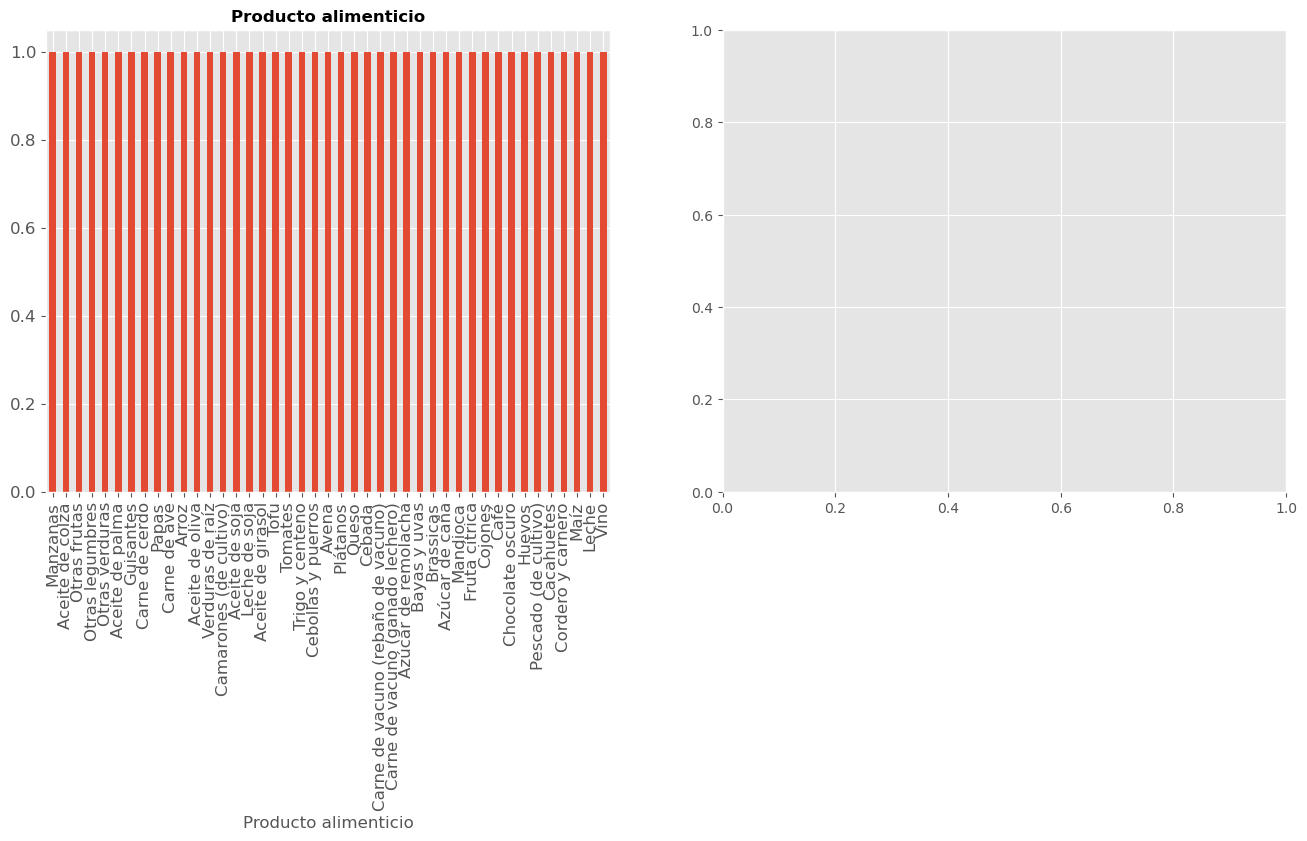

In [217]:
columnas_categoricas = ['Producto alimenticio']
columnas_numericas = ['Cambio de uso del suelo', 'Alimentar', 'Granja', 'Tratamiento', 'Transporte', 'Embalaje', 'Minorista', 'Total de terrenos a comercio minorista', 'Emisiones medias totales mundiales de GEI por kg']

def graficos_eda_categoricos(cat):
    from math import ceil
    filas = ceil(len(cat.columns) / 2)
    f, ax = plt.subplots(nrows=filas, ncols=2, figsize=(16, filas * 6))
    ax = ax.flat
    for indice, variable in enumerate(cat):
        cat[variable].value_counts().plot.bar(ax=ax[indice])
        ax[indice].set_title(variable, fontsize=12, fontweight='bold')
        ax[indice].tick_params(labelsize=12)

graficos_eda_categoricos(df_agricultura.select_dtypes(include=['object']))

Analisis multivariado categóricas y numéricas


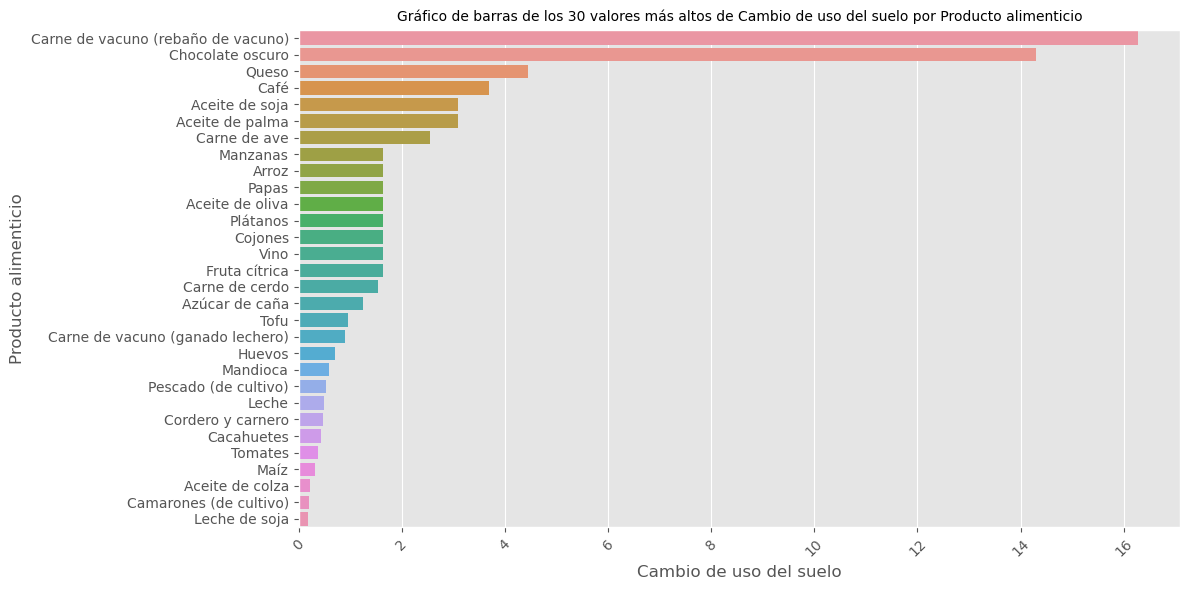

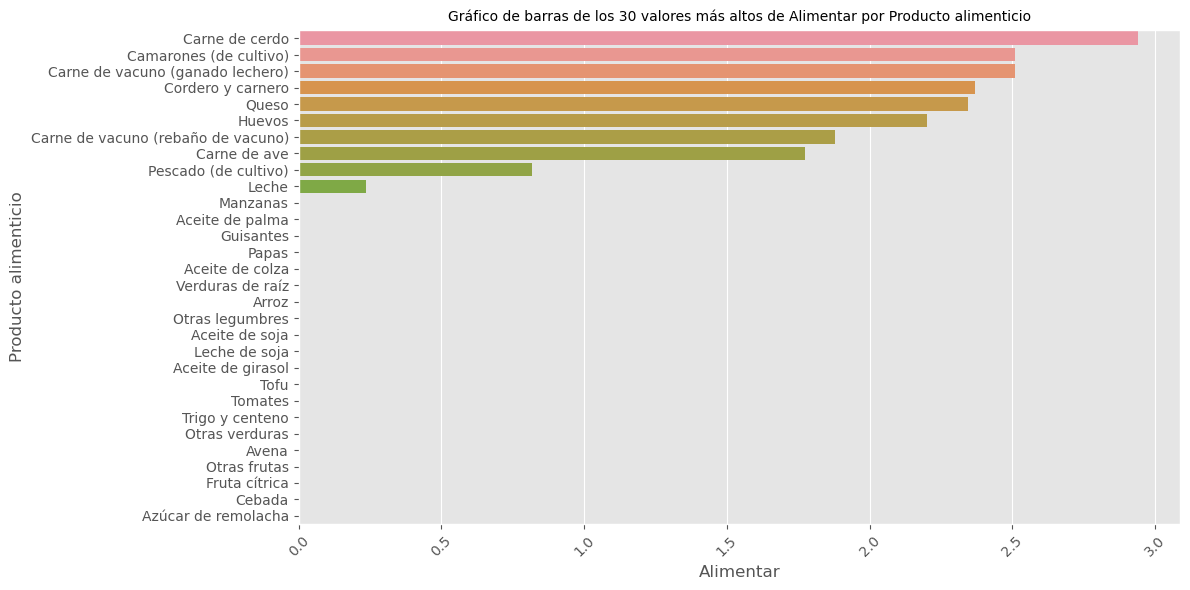

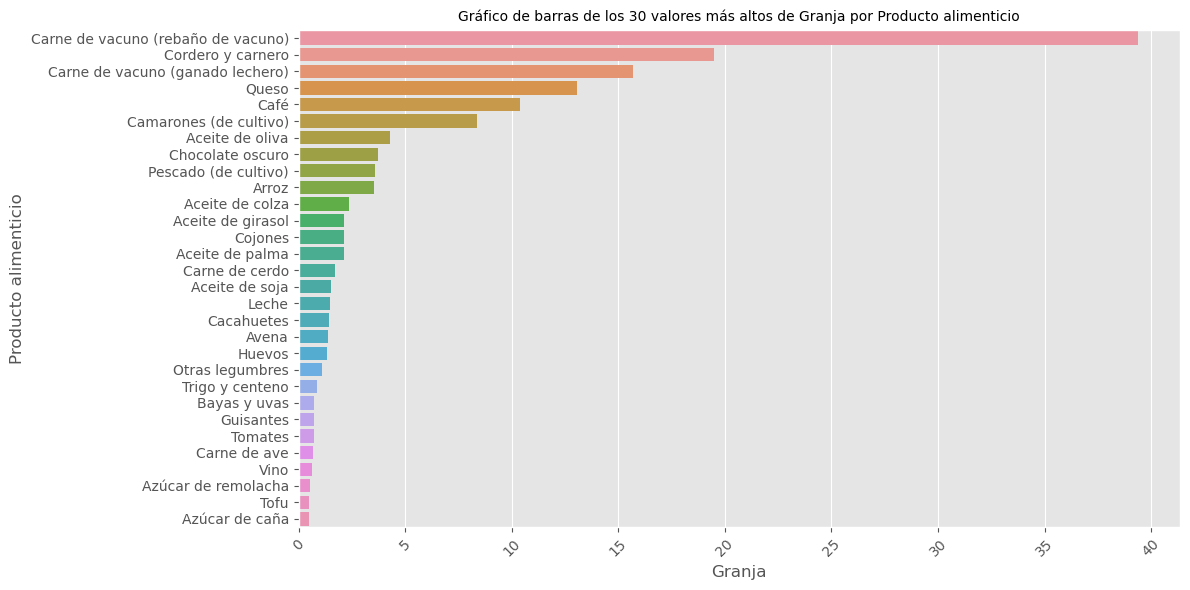

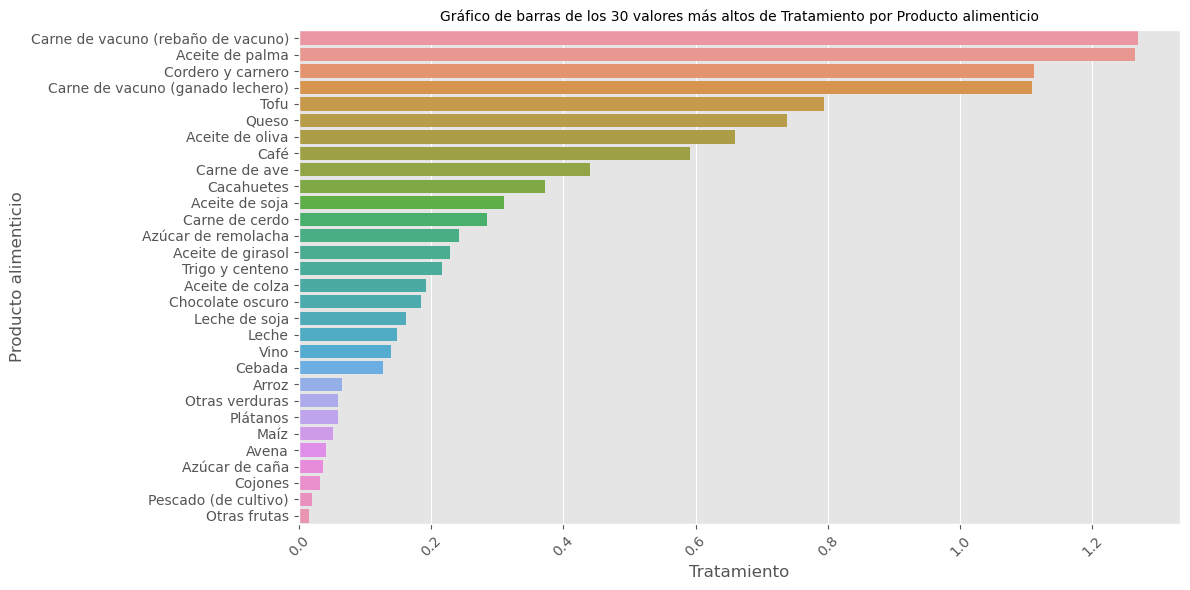

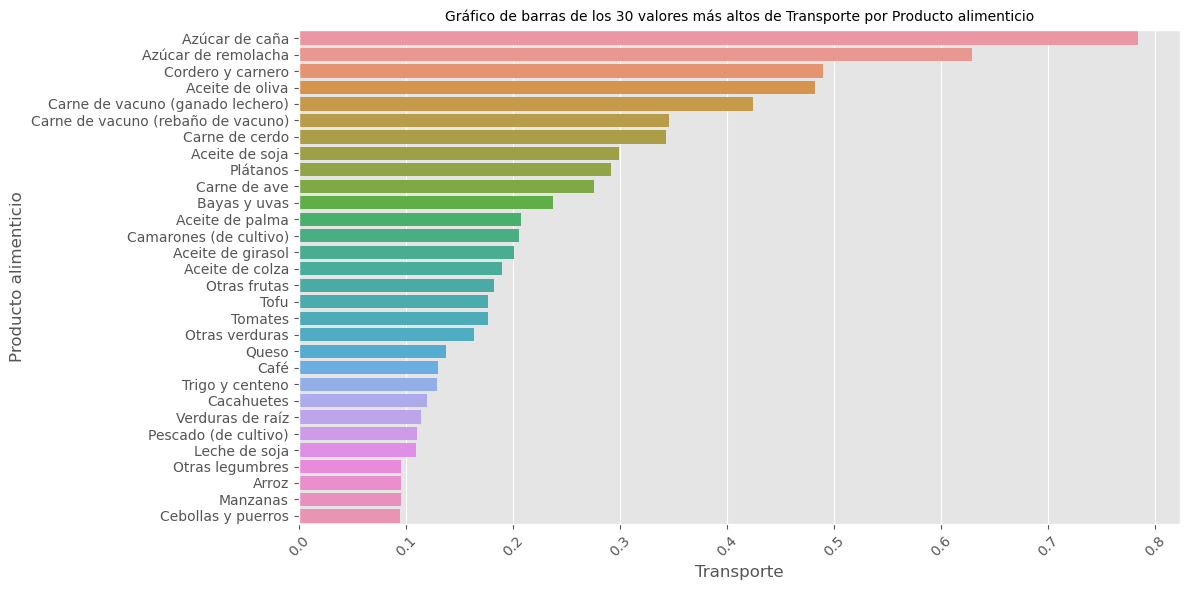

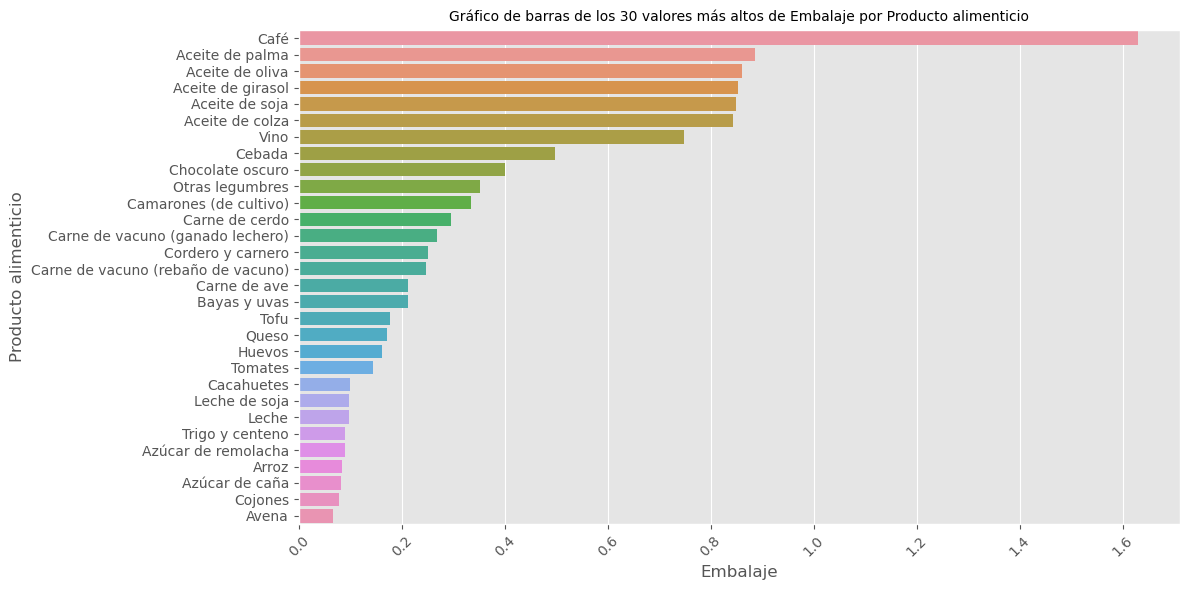

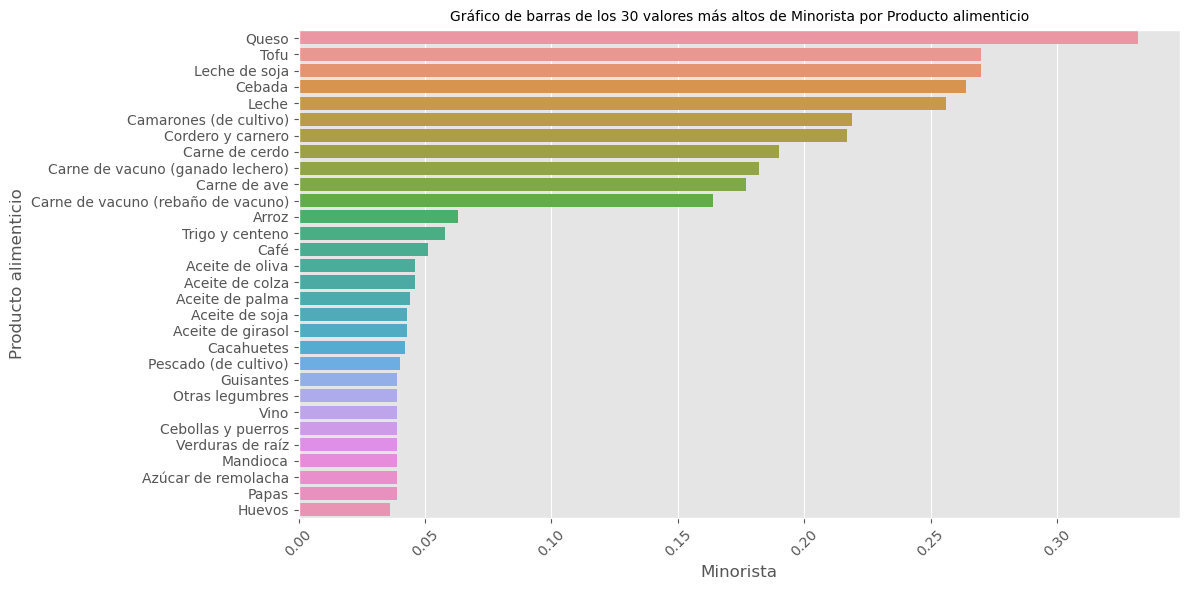

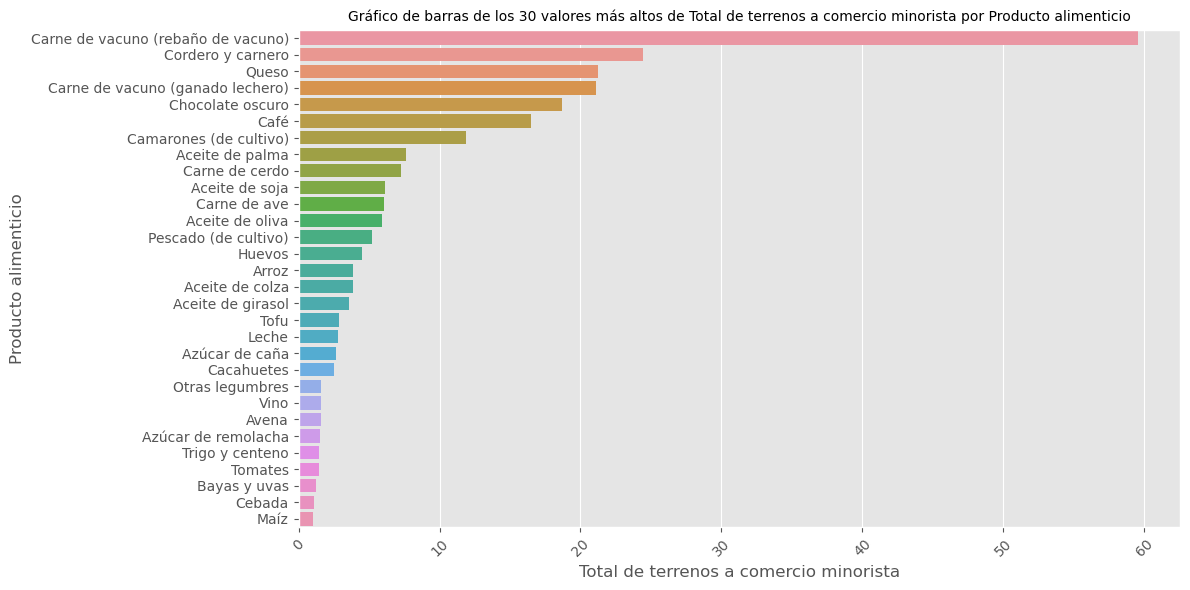

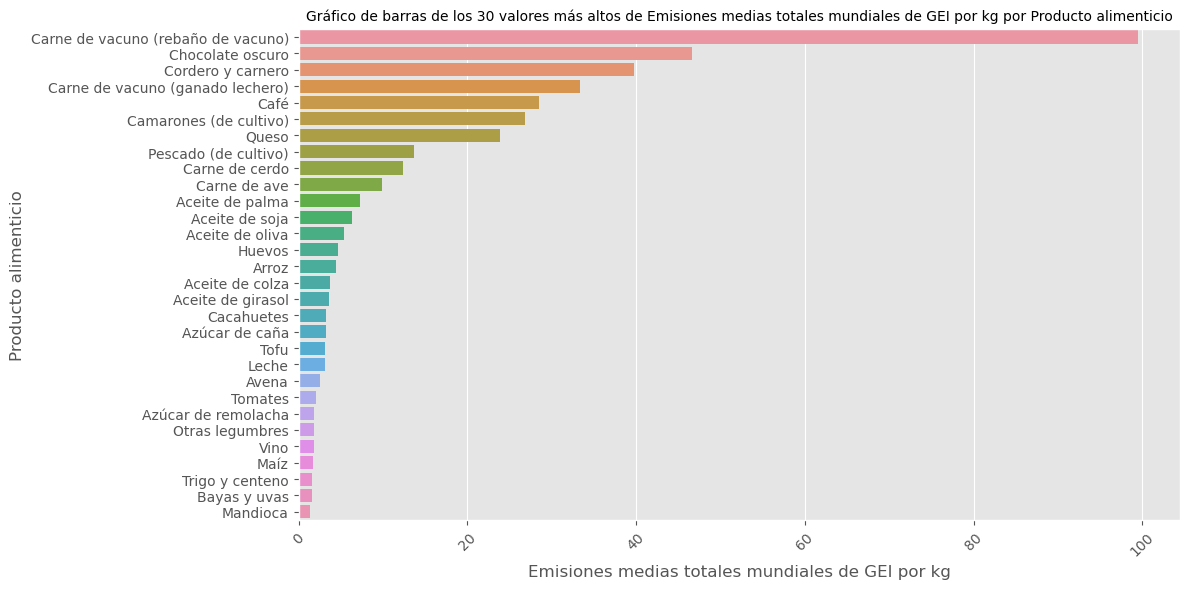

In [247]:
for cat_col in categóricas:
    for num_col in numéricas:
        top30 = df_agricultura.sort_values(by=num_col, ascending=False).head(30)
        plt.figure(figsize=(12, 6))
        sns.barplot(data=top30, y=cat_col, x=num_col)
        plt.title(f'Gráfico de barras de los 30 valores más altos de {num_col} por {cat_col}', fontsize=10)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

Analisis multivariado
Una forma sencilla de realizar los análisis multivariados es la realización de tablas pivotantes:

Vamos a ver como los 30 Producto alimenticio con valores más altos y las variables numéricas en una tabla pivotante

In [255]:
tabla_pivotante = pd.pivot_table(
    df_agricultura,
    values=[
        'Cambio de uso del suelo', 'Alimentar',
        'Granja', 'Tratamiento', 'Transporte', 'Embalaje', 'Minorista',
        'Total de terrenos a comercio minorista',
        'Emisiones medias totales mundiales de GEI por kg'
    ],
    index=['Producto alimenticio'],
    aggfunc='mean'
)

# Ordenamos la tabla pivotante por la columna deseada, en este caso 'Emisiones medias totales mundiales de GEI por kg'
# y obtenemos los 30 valores más altos
tabla_pivotante_ordenada = tabla_pivotante.sort_values(by='Emisiones medias totales mundiales de GEI por kg', ascending=False).head(30)

tabla_pivotante_ordenada

Alimentar  Cambio de uso del suelo  \
Producto alimenticio                                                     
Carne de vacuno (rebaño de vacuno)      1.878                16.278000   
Chocolate oscuro                        0.000                14.308000   
Cordero y carnero                       2.370                 0.468000   
Carne de vacuno (ganado lechero)        2.508                 0.906000   
Café                                    0.000                 3.688000   
Camarones (de cultivo)                  2.510                 0.206000   
Queso                                   2.346                 4.455000   
Pescado (de cultivo)                    0.819                 0.534000   
Carne de cerdo                          2.940                 1.535000   
Carne de ave                            1.775                 2.540000   
Aceite de palma                         0.000                 3.096000   
Aceite de soja                          0.000                 3.096000   
Aceite de oliva                         0.000                 1.630686   
Huevos                                  2.200                 0.709000   
Arroz                                   0.000                 1.630686   
Aceite de colza                         0.000                 0.212000   
Aceite de girasol                       0.000                 0.133000   
Cacahuetes                              0.000                 0.439000   
Azúcar de caña                          0.000                 1.247000   
Tofu                                    0.000                 0.958000   
Leche                                   0.236                 0.495000   
Avena                                   0.000                 0.001000   
Tomates                                 0.000                 0.372000   
Azúcar de remolacha                     0.000                 0.000000   
Otras legumbres                         0.000                 0.033000   
Vino                                    0.000                 1.630686   
Maíz                                    0.000                 0.315000   
Trigo y centeno                         0.000                 0.100000   
Bayas y uvas                            0.000                 0.025000   
Mandioca                                0.000                 0.589000   

                                    Embalaje  \
Producto alimenticio                           
Carne de vacuno (rebaño de vacuno)     0.247   
Chocolate oscuro                       0.400   
Cordero y carnero                      0.251   
Carne de vacuno (ganado lechero)       0.268   
Café                                   1.630   
Camarones (de cultivo)                 0.334   
Queso                                  0.172   
Pescado (de cultivo)                   0.061   
Carne de cerdo                         0.296   
Carne de ave                           0.212   
Aceite de palma                        0.886   
Aceite de soja                         0.849   
Aceite de oliva                        0.861   
Huevos                                 0.161   
Arroz                                  0.084   
Aceite de colza                        0.844   
Aceite de girasol                      0.853   
Cacahuetes                             0.099   
Azúcar de caña                         0.083   
Tofu                                   0.177   
Leche                                  0.097   
Avena                                  0.066   
Tomates                                0.145   
Azúcar de remolacha                    0.090   
Otras legumbres                        0.353   
Vino                                   0.749   
Maíz                                   0.060   
Trigo y centeno                        0.090   
Bayas y uvas                           0.212   
Mandioca                               0.045   

                                    Emisiones medias totales mundiales de GEI por kg  \
Producto alimenticio                      

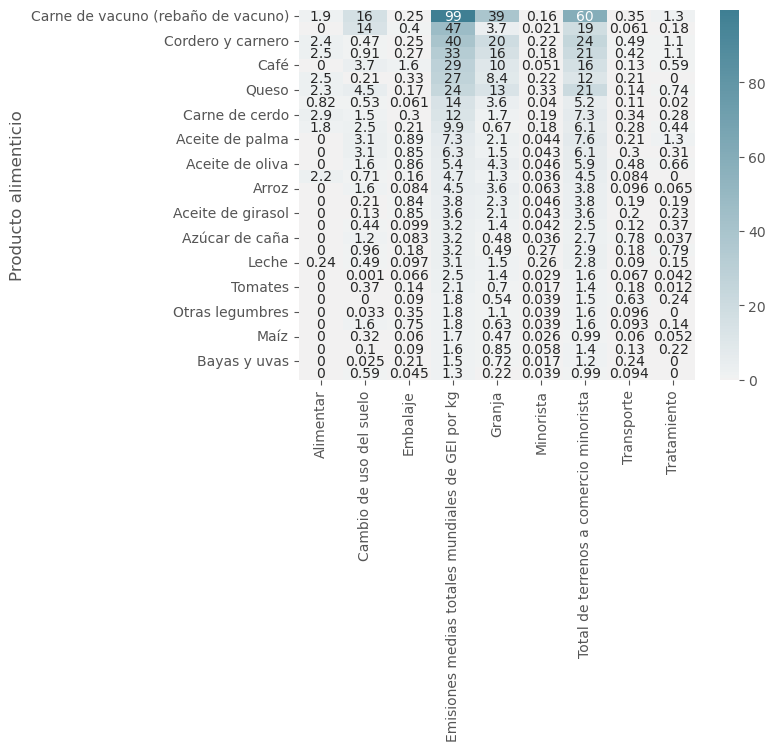

In [251]:
#Ahora como antes vamos a imprimir una mapa de calor con esta tabla
sns.heatmap(tabla_pivotante_ordenada, annot=True, cmap = sns.diverging_palette(40, 220, n=256), center=0.117)
plt.show()

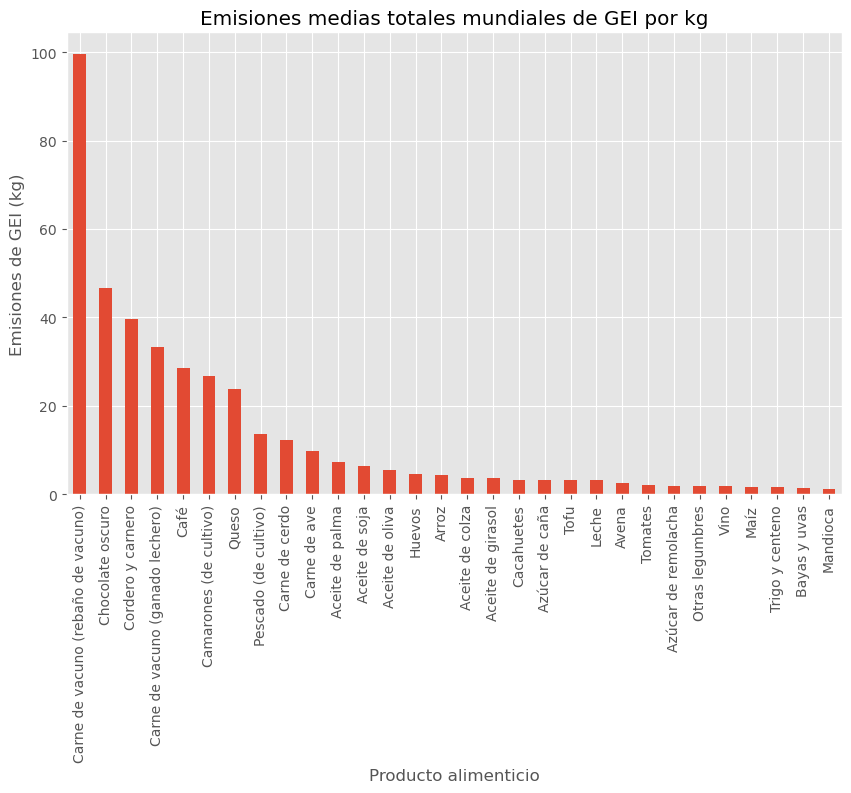

In [259]:

tabla_pivotante_ordenada['Emisiones medias totales mundiales de GEI por kg'].plot(kind='bar', figsize=(10, 6))

plt.title('Emisiones medias totales mundiales de GEI por kg')
plt.xlabel('Producto alimenticio')
plt.ylabel('Emisiones de GEI (kg)')
plt.xticks(rotation=90)
plt.show()

In [261]:
### Código para Visualización de Datos

# Datos de ejemplo
data = {
    'Producto': [
        'Carne de vacuno (rebaño)', 'Chocolate oscuro', 'Cordero', 
        'Carne de vacuno (ganado lechero)', 'Café', 'Camarones (de cultivo)', 
        'Queso', 'Pescado (de cultivo)', 'Carne de cerdo', 'Carne de ave',
        'Aceite de palma', 'Aceite de soja', 'Aceite de oliva',
        'Huevos', 'Arroz', 'Aceite de colza', 'Aceite de girasol', 
        'Cacahuetes', 'Azúcar de caña', 'Tofu'
    ],
    'Emisiones (kg CO2e/kg)': [
        1.9, 0, 2.4, 2.5, 0, 2.5, 2.3, 0.82, 2.9, 1.8,
        0, 0, 0, 2.2, 0, 0, 0, 0, 0, 0,
    ]
}

# Crear un DataFrame
df = pd.DataFrame(data)

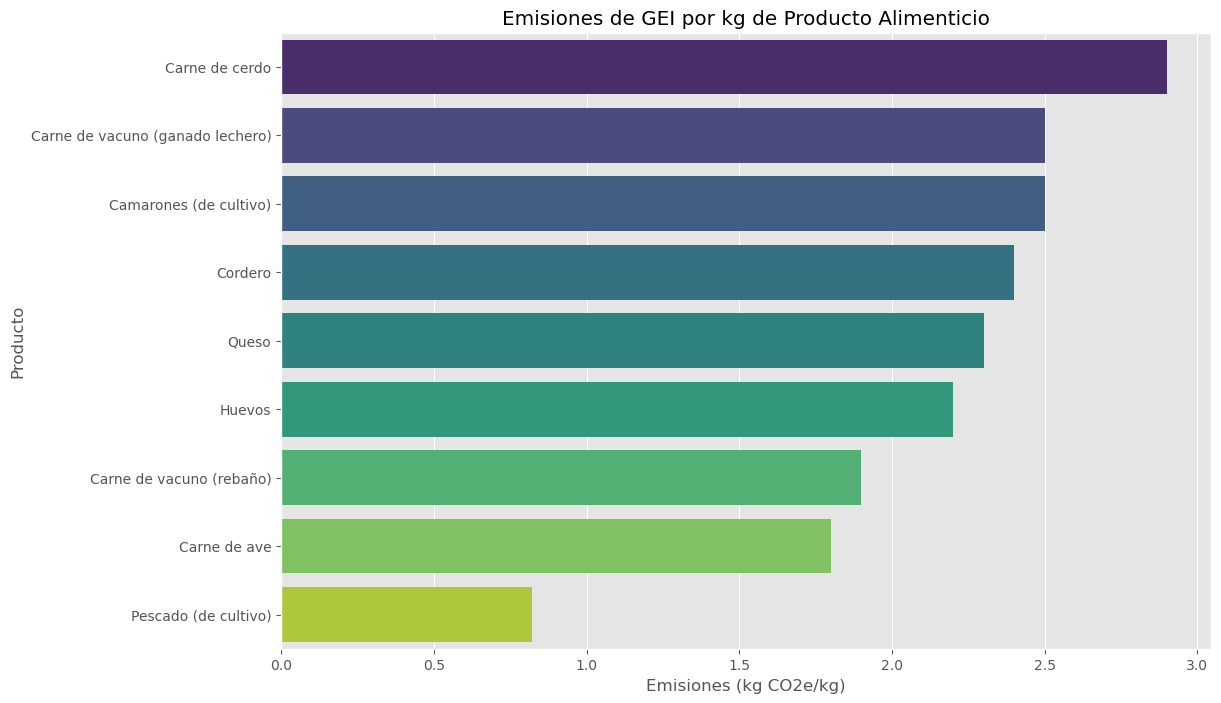

In [263]:
# Ordenar los datos por emisiones. #Este código genera un gráfico de barras que muestra las emisiones de GEI por kilogramo de varios productos alimenticios, lo que permite una comparación visual clara entre ellos. 
df = df[df['Emisiones (kg CO2e/kg)'] > 0].sort_values(by='Emisiones (kg CO2e/kg)', ascending=False)

# Visualización
plt.figure(figsize=(12, 8))
sns.barplot(x='Emisiones (kg CO2e/kg)', y='Producto', data=df, palette='viridis')
plt.title('Emisiones de GEI por kg de Producto Alimenticio')
plt.xlabel('Emisiones (kg CO2e/kg)')
plt.ylabel('Producto')
plt.show()


### Conclusiones e Insights Clave

- *Relación entre Procesos y Emisiones*: Las etapas de alimentación, tratamiento y transporte están correlacionadas con el cambio de uso del suelo y las emisiones, lo que sugiere que mejorar la eficiencia en cualquiera de estas etapas podría reducir el impacto ambiental general.

- *Prioridad en la Sostenibilidad*: Los productos que exhiben altas emisiones de GEI deben ser priorizados para la implementación de prácticas más sostenibles. Esto puede incluir la optimización de la cadena de suministro y el uso de prácticas agrícolas responsables.

- *Importancia de la Correlación*: La matriz de correlación indica áreas clave en las que las intervenciones pueden ser más efectivas. Por ejemplo, si el tratamiento tiene una alta correlación con las emisiones, se deberían considerar mejoras en esta fase para reducir el impacto.

- *Conciencia del Consumidor y Productores*: Comprender estas relaciones puede ayudar tanto a consumidores como a productores a tomar decisiones más informadas que minimicen el impacto ambiental de la producción alimentaria.

Estos insights subrayan la importancia de adoptar un enfoque integral para la producción de alimentos, considerando todas las etapas del proceso y su impacto en el medio ambiente.

### Interpretación de los Datos

1. *Emisiones por Producto*:
   - Los datos indican que la carne de vacuno (tanto de rebaños como de ganado lechero) tiene emisiones significativas, con valores de 1.9 y 2.5 kg de GEI por kg de producto, respectivamente.
   - Otros productos cárnicos, como la carne de cerdo (2.9 kg) y el cordero (2.4 kg), también muestran emisiones elevadas.
   - Productos de origen vegetal como el tofu y el arroz tienen emisiones significativamente más bajas, reflejando su potencial como alternativas más sostenibles.

2. *Cambio de Uso del Suelo y Embalaje*:
   - Los datos de cambio de uso del suelo y embalaje también son relevantes, indicando que ciertas prácticas agrícolas y de producción pueden tener un impacto ambiental considerable.
   - La cantidad de suelo utilizado para la producción de ciertos alimentos debe ser considerada en el contexto del cambio climático y la sostenibilidad.

3. *Emisiones Totales*:
   - Las emisiones totales de GEI por kg de producto varían significativamente, lo que sugiere que los consumidores pueden reducir su huella de carbono al optar por productos con menores emisiones.

### Conclusiones Clave

- *Prioridad en la Reducción de Consumo de Carne*: Dado que la carne de vacuno y otros productos cárnicos tienen altas emisiones, fomentar una dieta con menos carne puede contribuir a la reducción de GEI.
  
- *Fomentar Alternativas Sostenibles*: Los productos de origen vegetal, como el tofu y el arroz, presentan una menor huella de carbono y deberían ser promovidos como alternativas más sostenibles.

- *Revisión de Prácticas de Producción*: Las prácticas de producción y embalaje deben ser revisadas para minimizar el impacto ambiental, especialmente en productos con alta demanda.

- *Conciencia del Consumidor*: Informar a los consumidores sobre las emisiones asociadas con los productos que compran puede ayudar a tomar decisiones más sostenibles.

- *Necesidad de Prácticas Sostenibles*: Hay una necesidad urgente de adoptar prácticas más sostenibles en la producción agrícola, especialmente para productos que muestran un cambio significativo en el uso del suelo. Estas práctics sostenibles podrían ser:

### 1. **Agricultura Orgánica**
   - Uso de fertilizantes y pesticidas naturales en lugar de químicos sintéticos.
   - Rotación de cultivos para mantener la salud del suelo.

### 2. **Rotación de Cultivos**
   - Alternar diferentes tipos de cultivos en el mismo terreno para mejorar la salud del suelo y reducir plagas y enfermedades.

### 3. **Cultivo de Cobertura**
   - Plantar cultivos de cobertura (como leguminosas) para proteger el suelo, mejorar su calidad y prevenir la erosión.

### 4. **Conservación del Suelo**
   - Técnicas como la labranza mínima o la labranza cero para reducir la erosión y mejorar la retención de agua.

### 5. **Manejo Integrado de Plagas (MIP)**
   - Uso de métodos biológicos y culturales para controlar plagas, minimizando el uso de pesticidas.

### 6. **Agroforestería**
   - Integrar árboles y arbustos en los sistemas agrícolas para mejorar la biodiversidad, la salud del suelo y la captura de carbono.

### 7. **Uso Eficiente del Agua**
   - Implementar sistemas de riego eficientes, como el riego por goteo, para reducir el consumo de agua.

### 8. **Producción Local y de Temporada**
   - Fomentar el consumo de productos locales y de temporada para reducir la huella de carbono asociada al transporte.

### 9. **Certificaciones Sostenibles**
   - Obtener certificaciones como Fair Trade, Rainforest Alliance o USDA Organic, que garantizan prácticas sostenibles.

### 10. **Reducción de Residuos**
   - Implementar prácticas para reducir el desperdicio de alimentos y mejorar la gestión de residuos agrícolas.

### 11. **Biodiversidad**
   - Promover la diversidad de cultivos y la conservación de especies nativas para mejorar la resiliencia del ecosistema.

### 12. **Uso de Energías Renovables**
   - Incorporar fuentes de energía renovable, como solar o eólica, en las operaciones agrícolas.

### 13. **Educación y Capacitación**
   - Capacitar a los agricultores sobre prácticas sostenibles y su importancia para la salud del medio ambiente y la economía.

### 14. **Sistemas de Agricultura Regenerativa**
   - Enfocarse en prácticas que restauren la salud del suelo y aumenten la biodiversidad, como el pastoreo controlado y la agroecología.

### 15. **Tecnología y Monitoreo**
   - Utilizar tecnología, como sensores y drones, para monitorear la salud de los cultivos y optimizar el uso de recursos.

### Conclusión
Implementar estas prácticas no solo ayuda a reducir las emisiones de gases de efecto invernadero, sino que también mejora la salud del suelo, la biodiversidad y la resiliencia de los sistemas agrícolas frente al cambio climático. Al considerar estas prácticas, es importante evaluar el contexto local y las necesidades específicas de cada sistema agrícola.


Preparar los datos para nuestro modelo: nulos ya lo hicimos y no hay nulos. Transformar las varibles categoricas en numeros¶

In [175]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Categóricas
cat = df_agricultura.select_dtypes(include=[object])

# Instanciamos
ohe = OneHotEncoder(sparse_output=False)

# Entrenamos
ohe.fit(cat)

# Aplicamos
cat_ohe = ohe.transform(cat)

# Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns=ohe.get_feature_names_out())
cat_ohe.reset_index(drop=True, inplace=True)
cat_ohe

Producto alimenticio_Aceite de colza  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   
5                                    0.0   
6                                    0.0   
7                                    0.0   
8                                    0.0   
9                                    0.0   
10                                   0.0   
11                                   0.0   
12                                   0.0   
13                                   0.0   
14                                   0.0   
15                                   0.0   
16                                   0.0   
17                                   0.0   
18                                   0.0   
19                                   0.0   
20                                   0.0   
21                                   0.0   
22                                   0.0   
23                                   0.0   
24                                   0.0   
25                                   0.0   
26                                   0.0   
27                                   0.0   
28                                   0.0   
29                                   0.0   
30                                   0.0   
31                                   0.0   
32                                   1.0   
33                                   0.0   
34                                   0.0   
35                                   0.0   
36                                   0.0   
37                                   0.0   
38                                   0.0   
39                                   0.0   
40                                   0.0   
41                                   0.0   
42                                   0.0   

    Producto alimenticio_Aceite de girasol  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
5                                      0.0   
6                                      0.0   
7                                      0.0   
8                                      0.0   
9                                      0.0   
10                                     0.0   
11                                     0.0   
12                                     0.0   
13                                     0.0   
14                                     0.0   
15                                     0.0   
16                                     0.0   
17                                     0.0   
18                                     0.0   
19                                     0.0   
20                                     0.0   
21                                     0.0   
22                                     0.0   
23                                     0.0   
24                                     0.0   
25                                     0.0   
26                                     0.0   
27                                     0.0   
28                                     0.0   
29                                     0.0   
30                                     0.0   
31                                     0.0   
32                                     0.0   
33                                     0.0   
34                                     0.0   
35                                     0.0   
36                                     0.0   
37                                     0.0   
38                                     1.0   
39                                     0.0   
40                                     0.0   
41                                     0.0   
42                                     0.0   

    Producto alimenticio_Aceite de oliva  

In [179]:
# Una vez transformadas las variables categóricas a numéricas, las juntamos al df numérico y trabajamos sobre ello
num = df_Food_Product_Emissions.select_dtypes(include='number').reset_index(drop=True)

# Ahora unimos las variables numéricas a las categóricas que hemos transformado
df_ml = pd.concat([cat_ohe, num], axis=1)
df_ml

Producto alimenticio_Aceite de colza  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   
5                                    0.0   
6                                    0.0   
7                                    0.0   
8                                    0.0   
9                                    0.0   
10                                   0.0   
11                                   0.0   
12                                   0.0   
13                                   0.0   
14                                   0.0   
15                                   0.0   
16                                   0.0   
17                                   0.0   
18                                   0.0   
19                                   0.0   
20                                   0.0   
21                                   0.0   
22                                   0.0   
23                                   0.0   
24                                   0.0   
25                                   0.0   
26                                   0.0   
27                                   0.0   
28                                   0.0   
29                                   0.0   
30                                   0.0   
31                                   0.0   
32                                   1.0   
33                                   0.0   
34                                   0.0   
35                                   0.0   
36                                   0.0   
37                                   0.0   
38                                   0.0   
39                                   0.0   
40                                   0.0   
41                                   0.0   
42                                   0.0   

    Producto alimenticio_Aceite de girasol  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
5                                      0.0   
6                                      0.0   
7                                      0.0   
8                                      0.0   
9                                      0.0   
10                                     0.0   
11                                     0.0   
12                                     0.0   
13                                     0.0   
14                                     0.0   
15                                     0.0   
16                                     0.0   
17                                     0.0   
18                                     0.0   
19                                     0.0   
20                                     0.0   
21                                     0.0   
22                                     0.0   
23                                     0.0   
24                                     0.0   
25                                     0.0   
26                                     0.0   
27                                     0.0   
28                                     0.0   
29                                     0.0   
30                                     0.0   
31                                     0.0   
32                                     0.0   
33                                     0.0   
34                                     0.0   
35                                     0.0   
36                                     0.0   
37                                     0.0   
38                                     1.0   
39                                     0.0   
40                                     0.0   
41                                     0.0   
42                                     0.0   

    Producto alimenticio_Aceite de oliva  

### 8.  Modelado simple para estudio de viabilidad de proyecto. Análisis de Regresión lineal porque son variables numéricas no categóricas


Una vez preparado nuestro data set hacemos el diseño de la MODELIZACION. Para ello:
* Separamos la variable predictoras y target
* Separamos los conjuntos de entrenamiento y test

Target = Total Global Average GHG Emissions per kg = y ; 

Otras variables = factores que influyen = 'Feed', 'Farm', 'Processing', 'Land Use Change', 'Total from Land to Retail'= x

In [181]:
# Selecciona las variables independientes y dependientes para tu modelo de regresión.
# Seleccionar variables independientes y dependientes
X = df_ml[['Cambio de uso del suelo', 'Alimentar',
       'Granja', 'Tratamiento', 'Transporte', 'Embalaje', 'Minorista',
       'Total de terrenos a comercio minorista',
       ]]   

y = df_ml['Emisiones medias totales mundiales de GEI por kg'] 
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [187]:
# Hacer predicciones
y_pred = model.predict(X_test)

In [189]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio: {mse}')
print(f'R^2: {r2}')

Error Cuadrático Medio: 13.97738621676295
R^2: 0.9031763756157692


Comprobamos los valores reales y las predicciones.

In [191]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de y_train:", y_train.shape)

Dimensiones de X_train: (34, 8)
Dimensiones de y_train: (34,)


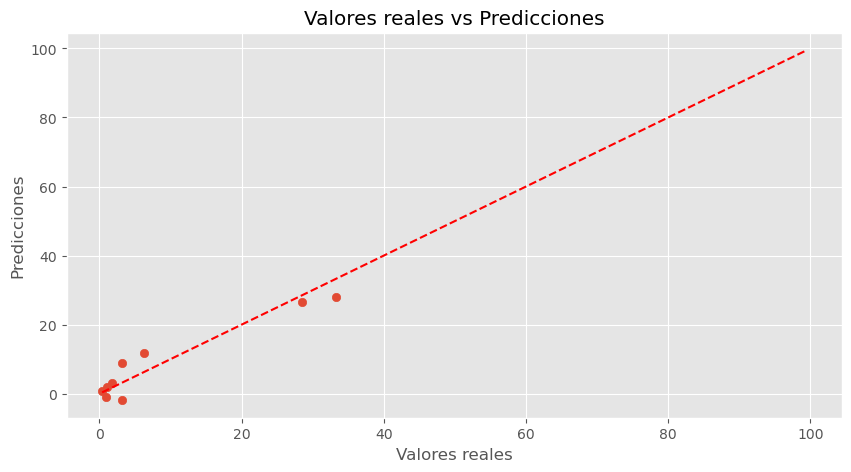

In [193]:
# Visualizar las predicciones, lo que permite visualizar el rendimiento del modelo.
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs Predicciones')
plt.show()

Vamos a considerar realizar un análisis de los residuos (diferencias entre valores reales y predicciones) para verificar si hay patrones que el modelo no está capturando. 

También vamos a explorar otros modelos de regresión o técnicas de Machine Learning para intentar mejorar aún más el ajuste.

In [196]:
#explorar un modelo de árbol de decisión . mirar esto

import statsmodels.api as sm

# Generar datos de ejemplo
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Variable independiente
y = 2.5 * X.squeeze() + np.random.randn(100) * 2  # Variable dependiente con ruido


In [198]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:
# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [202]:
# Realizar predicciones
y_pred = model.predict(X_test)

In [204]:
# Calcular residuos
residuos = y_test - y_pred

Text(0, 0.5, 'Residuos')

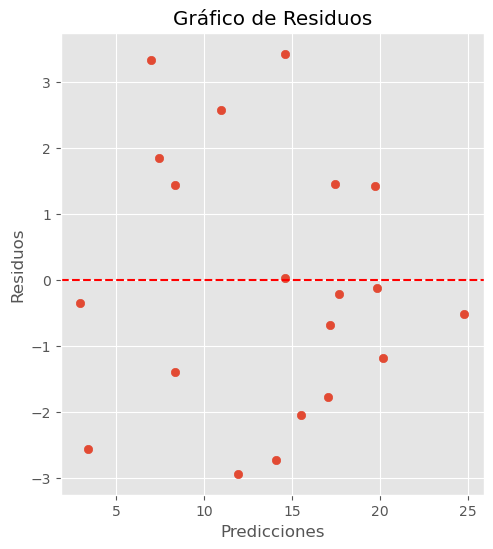

In [222]:
# Análisis de residuos
plt.figure(figsize=(12, 6))
# Gráfico de residuos
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')

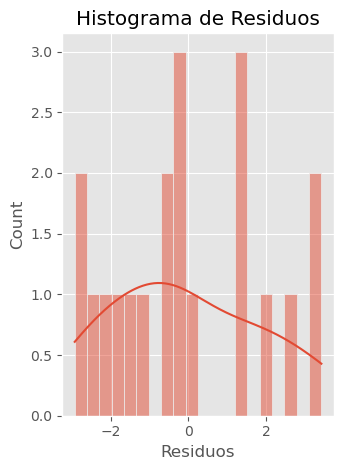

In [210]:
# Histograma de residuos
plt.subplot(1, 2, 2)
sns.histplot(residuos, bins=20, kde=True)
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')

plt.tight_layout()
plt.show()

In [ ]:
Y_test = pd.DataFrame({'Cambio de uso del suelo', 'Alimentar',
       'Granja', 'Tratamiento', 'Transporte', 'Embalaje', 'Minorista',
       'Total de terrenos a comercio minorista': Y_test, 'categoria': categorias})

In [626]:
# Resumen del modelo usando statsmodels
X_train_sm = sm.add_constant(X_train)  # Agregar constante para el intercepto
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1074.
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           2.29e-47
Time:                        21:17:24   Log-Likelihood:                -169.42
No. Observations:                  80   AIC:                             342.8
Df Residuals:                      78   BIC:                             347.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4127      0.417      0.990      0.3

### Exploración de Otros Modelos

Vamos a usar un modelo de regresión de árbol de decisión

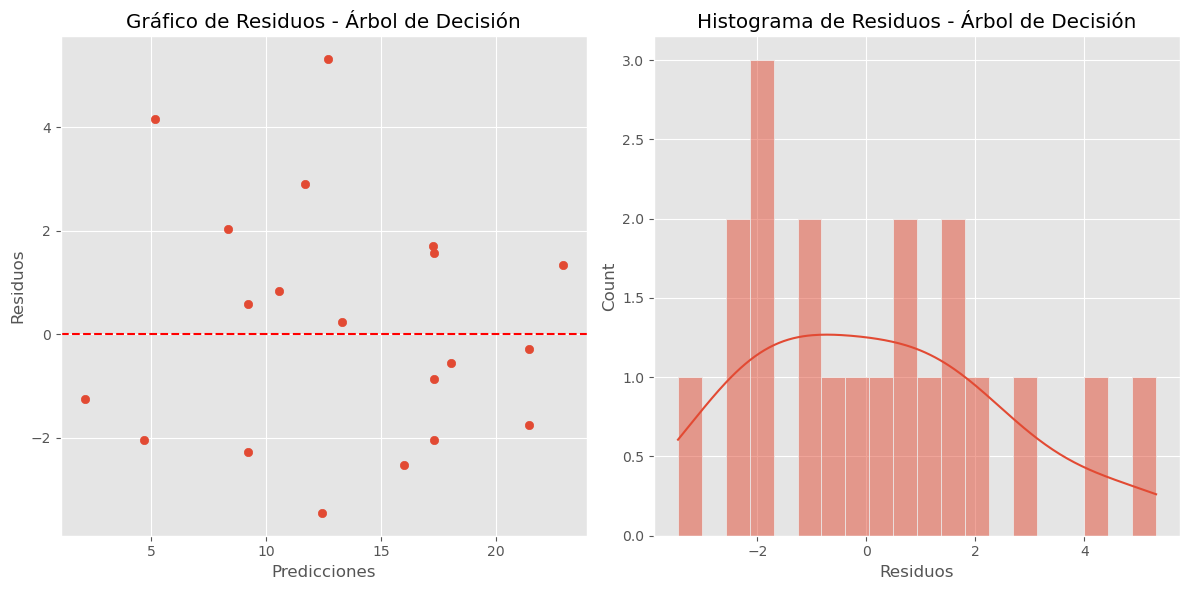

In [628]:
from sklearn.tree import DecisionTreeRegressor

# Ajustar un modelo de regresión de árbol de decisión
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Realizar predicciones
y_tree_pred = tree_model.predict(X_test)

# Calcular residuos para el modelo de árbol
tree_residuos = y_test - y_tree_pred

# Gráfico de residuos para el modelo de árbol
plt.figure(figsize=(12, 6))

# Gráfico de residuos
plt.subplot(1, 2, 1)
plt.scatter(y_tree_pred, tree_residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Residuos - Árbol de Decisión')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')

# Histograma de residuos
plt.subplot(1, 2, 2)
sns.histplot(tree_residuos, bins=20, kde=True)
plt.title('Histograma de Residuos - Árbol de Decisión')
plt.xlabel('Residuos')

plt.tight_layout()
plt.show()




### Regresión Logística. 

In [630]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Generar datos de ejemplo para regresión logística
np.random.seed(0)
X_logistic = np.random.rand(100, 1) * 10
y_logistic = (X_logistic.squeeze() > 5).astype(int)  # Variable dependiente binaria

# Dividir los datos
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train_log, y_train_log)



logisticRegr = LogisticRegression()



In [632]:
# Realizar predicciones
y_logistic_pred = logistic_model.predict(X_test_log)

# Evaluar el modelo
print(confusion_matrix(y_test_log, y_logistic_pred))
print(classification_report(y_test_log, y_logistic_pred))

[[ 8  0]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



Esto se puede interpretar de la siguiente manera:

- **8**: Número de verdaderos negativos (TN) - El modelo predijo correctamente la clase 0 (no pertenece a la clase positiva) en 8 ocasiones.
- **0**: Número de falsos positivos (FP) - El modelo predijo incorrectamente la clase 1 (pertenece a la clase positiva) en 0 ocasiones.
- **0**: Número de falsos negativos (FN) - El modelo predijo incorrectamente la clase 0 en 0 ocasiones.
- **12**: Número de verdaderos positivos (TP) - El modelo predijo correctamente la clase 1 en 12 ocasiones.

### Métricas de Evaluación

A partir de la matriz de confusión, se han calculado varias métricas:

- **Precisión (Precision)**: Es la proporción de verdaderos positivos sobre el total de predicciones positivas. En este caso, la precisión es 1.00 para ambas clases, lo que significa que todas las predicciones positivas fueron correctas.
  
- **Exhaustividad (Recall)**: Es la proporción de verdaderos positivos sobre el total de casos reales positivos. También es 1.00 para ambas clases, lo que indica que el modelo identificó correctamente todos los casos positivos.

- **F1-Score**: Es la media armónica entre la precisión y el recall. Un F1-score de 1.00 para ambas clases indica un rendimiento perfecto.

- **Soporte (Support)**: Es el número de ocurrencias de cada clase en los datos de prueba. En este caso, hay 8 instancias de la clase 0 y 12 instancias de la clase 1.

### Exactitud (Accuracy)
Esto significa que el modelo tiene una exactitud del **100%** en el conjunto de prueba, lo que indica que todas las predicciones fueron correctas.

### Conclusión

Tu modelo de regresión logística ha mostrado un rendimiento perfecto en este conjunto de datos, con una exactitud del 100%. Sin embargo, es importante tener en cuenta que este resultado puede ser indicativo de un sobreajuste, especialmente si el conjunto de datos es pequeño o si el modelo es demasiado complejo. Te recomendaría validar el modelo con un conjunto de datos más grande o realizar una validación cruzada para asegurarte de que el rendimiento se mantenga en diferentes subconjuntos de datos.

In [634]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix

# Generar un conjunto de datos de ejemplo (puedes usar tus propios datos)
X, y = make_classification(n_samples=100, n_features=20, n_classes=2, random_state=42)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística
logistic_model = LogisticRegression()

# Realizar validación cruzada
cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5)  # cv=5 significa 5 pliegues

# Mostrar los resultados de la validación cruzada
print("Puntajes de validación cruzada:", cv_scores)
print("Media de los puntajes de validación cruzada:", np.mean(cv_scores))

# Ajustar el modelo con el conjunto de entrenamiento completo
logistic_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test)

# Evaluar el modelo en el conjunto de prueba
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Puntajes de validación cruzada: [1.     0.9375 1.     0.9375 1.    ]
Media de los puntajes de validación cruzada: 0.975
[[13  0]
 [ 0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



1. **Precision**:
   - Para ambas clases (0 y 1), la precisión es 1.00, lo que significa que todas las predicciones positivas fueron correctas.

2. **Recall**:
   - El recall también es 1.00 para ambas clases, lo que indica que el modelo identificó correctamente todos los ejemplos de cada clase.

3. **F1-Score**:
   - El F1-score es 1.00 para ambas clases, lo que indica un equilibrio perfecto entre precisión y recall.

4. **Accuracy**:
   - La precisión general del modelo es 1.00, lo que significa que el modelo clasificó correctamente todos los ejemplos en el conjunto de prueba.

5. **Promedios**:
   - Tanto el promedio macro como el ponderado son 1.00, lo que refuerza que el modelo tiene un rendimiento perfecto en este conjunto de datos.

### Conclusión

En resumen, los resultados indican que tu modelo de regresión logística tiene un rendimiento excepcional, con una precisión, recall y F1-score perfectos en el conjunto de prueba. Esto sugiere que el modelo no solo se ajusta bien a los datos de entrenamiento, sino que también generaliza muy bien a datos no vistos. Sin embargo, es importante tener en cuenta que estos resultados pueden ser demasiado optimistas si el conjunto de datos es pequeño o si hay un desbalance significativo entre las clases. Siempre es recomendable validar los resultados con diferentes conjuntos de datos o técnicas adicionales.

In [662]:
#conda install -c conda-forge pandoc
!pip install pandoc


  Preparing metadata (setup.py) ... done
  Obtaining dependency information for plumbum from https://files.pythonhosted.org/packages/4f/9d/d03542c93bb3d448406731b80f39c3d5601282f778328c22c77d270f4ed4/plumbum-1.9.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 5.4 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.4-py3-none-any.whl size=34793 sha256=78ca023087051d1cfc9f45f35849b8c9c0d2cb4f508ad077a109ce0d96f4c4ea
  Stored in directory: /Users/toni/Library/Caches/pip/wheels/4f/d7/32/c6c9b7b05e852e920fd72174487be3a0f18e633a7adcc303be
Successfully built pandoc


In [678]:
# Primero, instala reportlab si aún no lo has hecho
!pip install reportlab

from reportlab.pdfgen import canvas

def export_to_pdf(data, filename):
    c = canvas.Canvas(filename)
    c.drawString(100, 750, data)
    c.save()

# Reemplaza 'your_data' con la información que deseas exportar
# y 'output.pdf' con el nombre de archivo que prefieras
export_to_pdf('food_product_emissions', 'food_product_emissions.pdf')

In [234]:
!pip3 install xlwt
import xlwt
import openpyxl
